<h1> Story Telling: Doctor’s Helper </h1>

Task is described in task.docx.

<h1> Data Analysis </h1>

<h2> Defining the question </h2>

Look for patterns in the data, that will help discover patients at risk.

<h2> Libraries </h2>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from scipy import stats
from IPython.display import HTML

<h2> Load the data </h2>

Let's load our data and check if we did it correctly.

In [14]:
df = pd.read_csv('data/good_doctor_data.csv')

In [15]:
df.head()

,Unique_ID,# Pregnancies,Blood Chemestry~I,Blood Chemisty~II,Blood Chemisty~III,Blood Pressure,Skin Thickness,BMI,Genetic Predisposition Factor,Age,Air Qual'ty Index,$tate,Outcome
0,5642118.0,1.0,0.0,23.0,10.0,74.0,20.0,27.7,0.299,21.0,38.0,CA,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5642119.0,1.0,0.0,0.0,61.0,68.0,35.0,32.0,0.389,22.0,10.0,CA,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5642120.0,1.0,0.0,0.0,172.0,48.0,20.0,24.7,0.140,22.0,77.0,CA,0.0


<h2> Data Cleaning </h2>

In this section, we will replace 0's with nans several times. These values looks very suspicious as our short analysis will show, that they are unwanted. It would be valubale to contact with data creator, or to find more information about features of these 0's, to confirm our assumptions. Another approach would be to fill the missing values using methods such us mean/median imputation, KNN and others.

<h3> Structure </h3>

At first, we will change column names to more suitable ones.

In [28]:
df.columns = ['id', 'Pregnancies', 'Blood Chemistry 1', 'Blood Chemistry 2',
              'Blood Chemistry 3', 'Blood Pressure', 'Skin Condition', 'BMI',
              'Genetic Predisposition Factor', 'Age', 'Air Quality Index',
              'State', 'Outcome']

In [29]:
df.head(1)

,id,Pregnancies,Blood Chemistry 1,Blood Chemistry 2,Blood Chemistry 3,Blood Pressure,Skin Condition,BMI,Genetic Predisposition Factor,Age,Air Quality Index,State,Outcome
0,5642118.0,1.0,0.0,23.0,10.0,74.0,20.0,27.7,0.299,21.0,38.0,CA,0.0


Let's look at State column. We can suspect it of bad naming, not including all states, etc.

In [30]:
states = df['State'].unique()
len(states)

50

In [36]:
states

array(['CA', nan, 'OR', 'CT', 'UT', 'WV', 'TN', 'VA', 'FL', 'KY', 'WI',
       'AR', 'MA', 'PA', 'AZ', 'IA', 'MO', 'CO', 'GA', 'SC', 'OH', 'MD',
       'IL', 'OK', 'NY', 'LA', 'NC', 'MN', 'NE', 'NJ', 'MS', 'IN', 'KS',
       'DE', 'MT', 'AL', 'MI', 'NV', 'WA', 'SD', 'ME', 'ID', 'HI', 'TX',
       'NH', 'RI', 'NM', 'ND', 'VT', 'KU'], dtype=object)

In [33]:
df['State'].isnull().values.any()

True

In [34]:
df['State'].value_counts(dropna=False)

NaN    3839
CA      525
FL      275
NY      255
PA      165
IL      160
OH      150
TX      135
GA      135
MI      135
NC      135
NJ      110
VA      105
TN       90
AZ       90
WA       85
MN       85
MA       85
WI       80
IN       80
MO       75
MD       75
AL       65
LA       65
SC       65
CO       55
KY       55
OK       50
OR       50
CT       40
AR       40
MS       40
UT       35
NV       35
KS       35
IA       35
WV       30
NE       15
MT       10
DE       10
ME       10
ID       10
HI       10
NH       10
RI       10
KU       10
SD        5
NM        5
ND        5
VT        5
Name: State, dtype: int64

As we can see there is no data about one of the states, since USA has 50 states, and we have 49 (+none which can represent any state).

I found a list of all states:

In [37]:
USA_states = [ 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
           'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
           'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
           'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
           'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']

Let's check the difference of its sets.

In [38]:
set(USA_states) - set(states)

{'AK', 'DC', 'WY'}

In [39]:
set(states) - set(USA_states)

{'KU', nan}

AK stands for Alaska, DC - District of Columbia and WY - Wyoming. KU in our df stands for KANSAS, which oryginaly is KS. We can change it.

In [40]:
df['State'].replace('KU', 'KS', inplace=True)

In [41]:
states = df['State'].unique()
states

array(['CA', nan, 'OR', 'CT', 'UT', 'WV', 'TN', 'VA', 'FL', 'KY', 'WI',
       'AR', 'MA', 'PA', 'AZ', 'IA', 'MO', 'CO', 'GA', 'SC', 'OH', 'MD',
       'IL', 'OK', 'NY', 'LA', 'NC', 'MN', 'NE', 'NJ', 'MS', 'IN', 'KS',
       'DE', 'MT', 'AL', 'MI', 'NV', 'WA', 'SD', 'ME', 'ID', 'HI', 'TX',
       'NH', 'RI', 'NM', 'ND', 'VT'], dtype=object)

<h3> Removing major errors, duplicates, and outliers </h3>

Now, we will drop rows with only nan values.

In [42]:
df = df.dropna(axis=0, how='all')

In our dataframe, we have an patient id column. Let's check if there is one row per patient or not.

In [47]:
len(df['id'].unique())

768

In [48]:
df.shape

(3840, 13)

In [52]:
set(df['id'].value_counts().values)

{5}

As we can see, there are 5 rows per one patient. Unluckily we have no information about the order or time of the different results of a patient. If that were the case, we could study the effect of variation in certain factors on disease risk. In our case, we will treat all rows separately, regardless of id.

Let's check if there are any duplicates.

In [53]:
df.duplicated().sum()

19

There are 19 duplicate rows, let's drop them.

In [54]:
df.shape

(3840, 13)

In [55]:
df = df.drop_duplicates()
df.shape

(3821, 13)

Let's see also ratio of the Outcome's categories, which might be useful later.

In [56]:
df.groupby(['Outcome']).count()['BMI']

Outcome
0.0    2489
1.0    1332
Name: BMI, dtype: int64

In [57]:
global data_ratio
data_ratio = 1322/(2444+1322)
data_ratio

0.3510355815188529

Around 35% of the rows has Outcome value equal to 1.

Now we will display histograms to get some more information about the data.

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Blood Chemistry 1'}>],
       [<AxesSubplot:title={'center':'Blood Chemistry 2'}>,
        <AxesSubplot:title={'center':'Blood Chemistry 3'}>,
        <AxesSubplot:title={'center':'Blood Pressure'}>],
       [<AxesSubplot:title={'center':'Skin Condition'}>,
        <AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'Genetic Predisposition Factor'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Air Quality Index'}>,
        <AxesSubplot:>]], dtype=object)

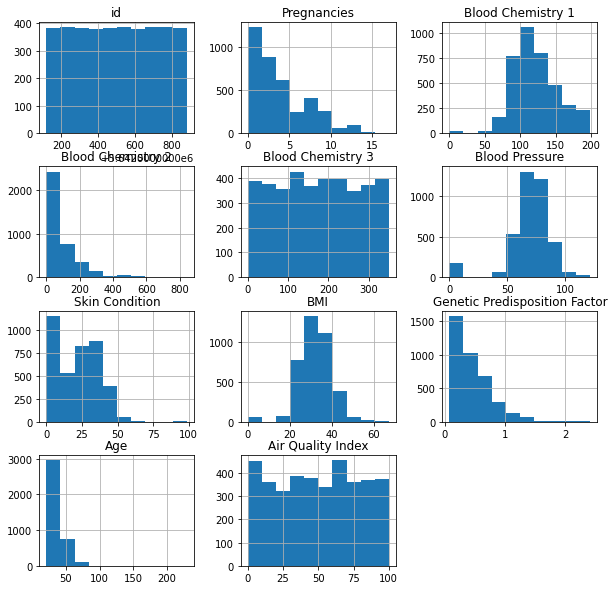

In [58]:
cols = [col for col in df.columns if col not in ['States', 'Outcome']]
df[cols].hist(figsize=(10, 10))

At first let's check if there are children with pregnancies, which is incorrect data.

In [59]:
df['Age'].unique()

array([ 21.,  22.,  36.,  41.,  67.,  46.,  42.,  23.,  25.,  47.,  26.,
        38.,  27.,  39.,  33.,  24.,  35.,  28.,  32.,  34.,  31.,  29.,
        30.,  37.,  48.,  58.,  68.,  56.,  57.,  40.,  43., 230.,  50.,
        63.,  45.,  55.,  65.,  53.,  44.,  52.,  54.,  60.,  66.,  72.,
        64.,  62.,  51.,  49.,  69.,  81.,  59.,  61.,  70.])

There is no children, but 230 value is incorrect.

At the beginning Age was a float column, so we can be almost sure that somebody wrote dot in a wrong place. Let's change it to 23.

In [21]:
df['Age'] = df['Age'].replace(230, 23)

In [22]:
df['Age'].unique()

array([21., 22., 36., 41., 67., 46., 42., 23., 25., 47., 26., 38., 27.,
       39., 33., 24., 35., 28., 32., 34., 31., 29., 30., 37., 48., 58.,
       68., 56., 57., 40., 43., 50., 63., 45., 55., 65., 53., 44., 52.,
       54., 60., 66., 72., 64., 62., 51., 49., 69., 81., 59., 61., 70.])

There is also a chance that someone wrote 230, because 2 could left in the field before entering the new value, which should be 30. So another approach will be to average column values for age groups around 23 and 30 and check which of the groups our example fits better.

On the histograms we can see also, that there are some very low Blood Pressure and BMI values. It's probably 0 in a place no measurement.

In [60]:
df_very_low_BMI = df.loc[df['BMI'] < 17]
df_very_low_BMI['BMI'].unique(), df_very_low_BMI.shape[0]

(array([0.]), 55)

Let's change these values to nans.

In [61]:
df['BMI'] = df['BMI'].replace(0, np.nan)

In [62]:
df['BMI'].isna().sum().sum()

55

Great. Let's check the pressure now.

In [63]:
df_very_low_BP = df.loc[df['Blood Pressure'] < 15]
df_very_low_BP['Blood Pressure'].unique(), df_very_low_BP.shape[0]

(array([0.]), 175)

The same situation as before. Let's handle this the same way.

In [64]:
df['Blood Pressure'] = df['Blood Pressure'].replace(0, np.nan)
df['Blood Pressure'].isna().sum().sum()

175

Let's look also on a skin condition.

In [65]:
df['Skin Condition'].isna().sum().sum()

5

<AxesSubplot:>

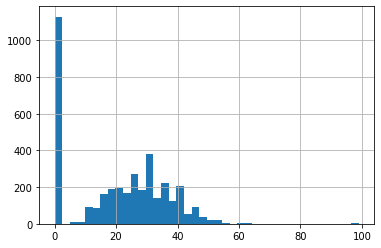

In [66]:
df['Skin Condition'].hist(bins=40)

None of us have perfect skin. Probably 0's means missing value here.

In [67]:
df.groupby(['Skin Condition', 'Outcome']).count()['BMI']

Skin Condition  Outcome
0.0             0.0        657
                1.0        427
7.0             0.0          5
                1.0          5
8.0             0.0         10
                          ... 
54.0            0.0         10
56.0            1.0          5
60.0            0.0          5
63.0            1.0          5
99.0            1.0          5
Name: BMI, Length: 89, dtype: int64

Also the Outcome ratio for 0's seems pretty random:

In [68]:
427 / (427+657), data_ratio

(0.39391143911439114, 0.3510355815188529)

We will set nans in the place of 0's. However, in reality it would be crucial to talk with data creator, or to find information about this feature, to to be one 100 percent sure, that these are missing valeus.

In [69]:
df['Skin Condition'] = df['Skin Condition'].replace(0, np.nan)
df['Skin Condition'].isna().sum().sum()

1134

There are also some outliers 99, which seems incorrect. We will set them as missing also.

In [70]:
df['Skin Condition'] = df['Skin Condition'].replace(99, np.nan)

In [71]:
df['Skin Condition'].isna().sum().sum()

1139

On the histograms, we can see also, that there are some outliers in Blood Chemistry 1 column.

In [72]:
df.loc[df['Blood Chemistry 1'] < 30]

,id,Pregnancies,Blood Chemistry 1,Blood Chemistry 2,Blood Chemistry 3,Blood Pressure,Skin Condition,BMI,Genetic Predisposition Factor,Age,Air Quality Index,State,Outcome
0,5642118.0,1.0,0.0,23.0,10.0,74.0,20.0,27.7,0.299,21.0,38.0,CA,0.0
2,5642119.0,1.0,0.0,0.0,61.0,68.0,35.0,32.0,0.389,22.0,10.0,CA,0.0
4,5642120.0,1.0,0.0,0.0,172.0,48.0,20.0,24.7,0.140,22.0,77.0,CA,0.0
1000,5642618.0,5.0,0.0,0.0,331.0,80.0,32.0,41.0,0.346,37.0,98.0,IL,1.0
1002,5642619.0,6.0,0.0,0.0,197.0,68.0,41.0,39.0,0.727,41.0,100.0,NJ,1.0
1536,5642118.0,1.0,0.0,23.0,228.0,74.0,20.0,27.7,0.299,21.0,38.0,CA,0.0
1538,5642119.0,1.0,0.0,0.0,146.0,68.0,35.0,32.0,0.389,22.0,10.0,CA,0.0
1540,5642120.0,1.0,0.0,0.0,229.0,48.0,20.0,24.7,0.140,22.0,77.0,CA,0.0
2536,5642618.0,5.0,0.0,0.0,239.0,80.0,32.0,41.0,0.346,37.0,98.0,IL,1.0
2538,5642619.0,6.0,0.0,0.0,246.0,68.0,41.0,39.0,0.727,41.0,100.0,NJ,1.0


In [73]:
df['Blood Chemistry 1'].isna().sum().sum()

25

There are also some nans in this column.

However, such a situation like on this histogram is very strange and we can be pretty sure that 0's have been writting as a missing values. Let's plot it on a bigger picture.

<AxesSubplot:>

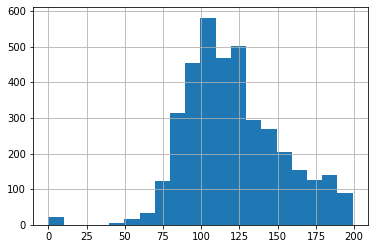

In [74]:
df['Blood Chemistry 1'].hist(bins=20)

Let's check also, what is the Outcome ratio for these 0's.

In [75]:
df.groupby(['Blood Chemistry 1', 'Outcome']).count()['BMI']

Blood Chemistry 1  Outcome
0.0                0.0        15
                   1.0         8
44.0               0.0         5
56.0               0.0         5
57.0               0.0        10
                              ..
196.0              1.0        13
197.0              0.0         5
                   1.0        15
198.0              1.0         5
199.0              1.0         5
Name: BMI, Length: 215, dtype: int64

In [76]:
8 / (15+8), data_ratio

(0.34782608695652173, 0.3510355815188529)

0's in 'Blood Chemistry 1 are very suspicious. After a short analysis we will just set them as missing values.

In [77]:
df['Blood Chemistry 1'] = df['Blood Chemistry 1'].replace(0, np.nan)
df['Blood Chemistry 1'].isna().sum().sum()

48

Similar situation occur for Blood Chemistry 2:

<AxesSubplot:>

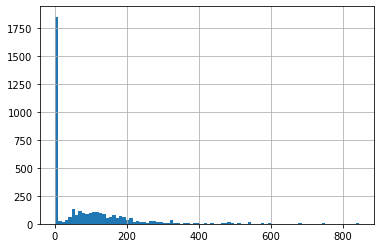

In [78]:
df['Blood Chemistry 2'].hist(bins=90)

Let's plot it by Outcome's catagories.

<AxesSubplot:xlabel='Blood Chemistry 2', ylabel='Count'>

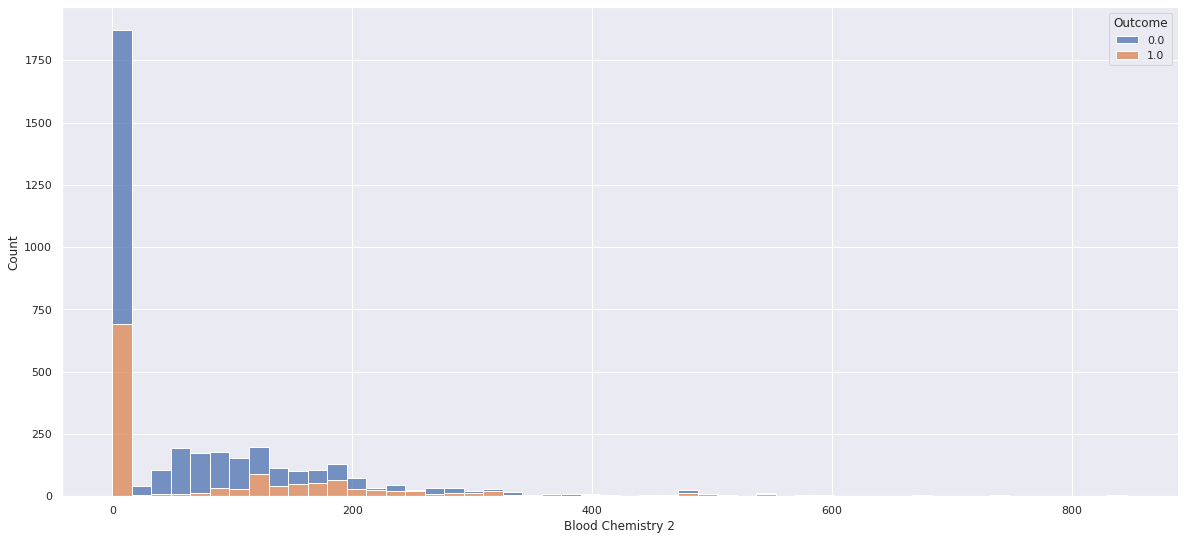

In [79]:
sns.set(rc={'figure.figsize':(20,9)})
data = df[~df['Blood Chemistry 2'].isnull()]
sns.histplot(data=data, x='Blood Chemistry 2', hue='Outcome', discrete=False, multiple='stack')

In [80]:
df.groupby(['Blood Chemistry 2', 'Outcome']).count()['BMI']

Blood Chemistry 2  Outcome
0.0                0.0        1130
                   1.0         675
14.0               1.0           5
15.0               0.0           5
16.0               0.0           5
                              ... 
579.0              1.0           5
600.0              1.0           5
680.0              0.0           5
744.0              0.0           5
846.0              1.0           5
Name: BMI, Length: 230, dtype: int64

Let's check the ratio.

In [81]:
675 / (675+1130), data_ratio

(0.3739612188365651, 0.3510355815188529)

This is also very reliable random ratio. We will ignore these 0's, sice they are very suspicous as laboratory test result.

In [82]:
df['Blood Chemistry 2'] = df['Blood Chemistry 2'].replace(0, np.nan)
df['Blood Chemistry 2'].isna().sum().sum()

1865

<h2> Analyzing the data </h2>

<h3> Missing values </h3>

Let's look at structure of missing values first, as it might gives us some insights.

In [83]:
df.isna().sum().sum(), df.isna().sum().sum() / (df.shape[0] * df.shape[1])

(3312, 0.06667606144182957)

Thera are 3312 null entries, which means that around 7% of our data is missing. Let's check in which columns the data is missing.

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3821 entries, 0 to 7678
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             3821 non-null   float64
 1   Pregnancies                    3821 non-null   float64
 2   Blood Chemistry 1              3773 non-null   float64
 3   Blood Chemistry 2              1956 non-null   float64
 4   Blood Chemistry 3              3821 non-null   float64
 5   Blood Pressure                 3646 non-null   float64
 6   Skin Condition                 2682 non-null   float64
 7   BMI                            3766 non-null   float64
 8   Genetic Predisposition Factor  3821 non-null   float64
 9   Age                            3821 non-null   float64
 10  Air Quality Index              3791 non-null   float64
 11  State                          3821 non-null   object 
 12  Outcome                        3821 non-null   f

<AxesSubplot:>

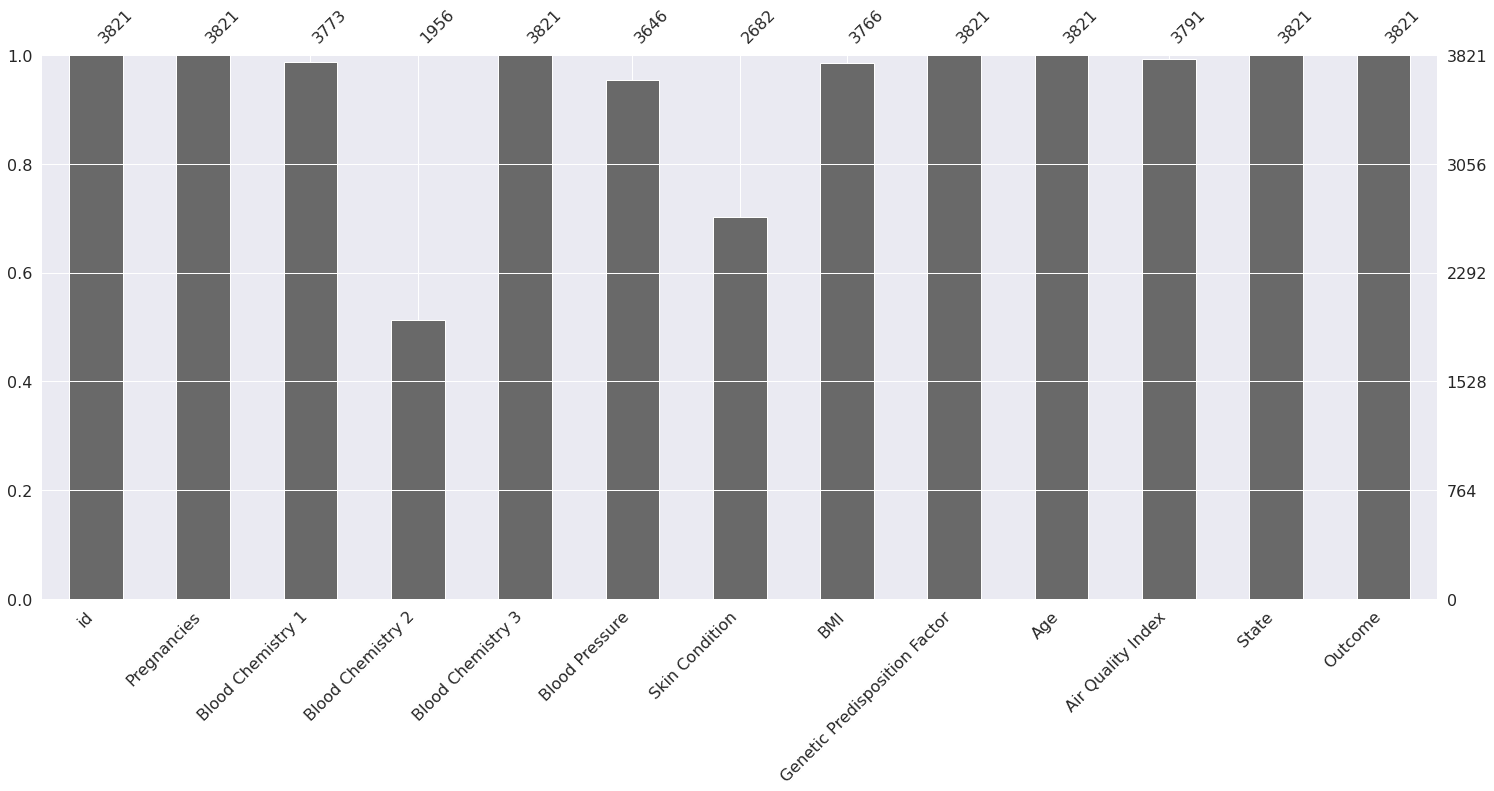

In [85]:
msno.bar(df)

In [86]:
df.isnull().sum()/len(df)

id                               0.000000
Pregnancies                      0.000000
Blood Chemistry 1                0.012562
Blood Chemistry 2                0.488092
Blood Chemistry 3                0.000000
Blood Pressure                   0.045800
Skin Condition                   0.298090
BMI                              0.014394
Genetic Predisposition Factor    0.000000
Age                              0.000000
Air Quality Index                0.007851
State                            0.000000
Outcome                          0.000000
dtype: float64

As we can see there are missing values in

- Blood Chemistry 1: 1%

- Blood Chemistry 2: 49% !

- Blood Pressure: 5%

- Skin Condition: 30%

- Air Quality Index: 1%

In parcticular, Blood Chemistry 2 column contains 49% missing values.

<AxesSubplot:>

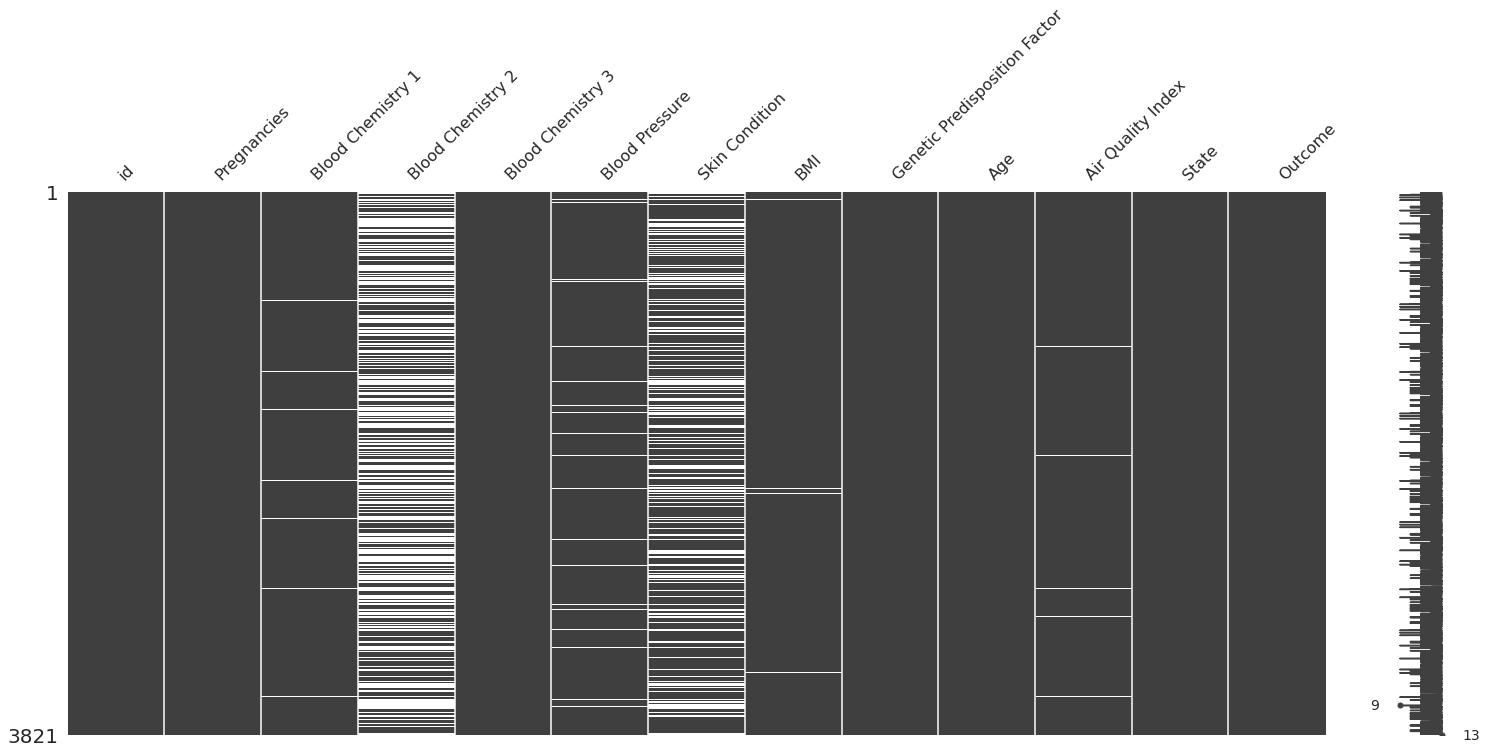

In [87]:
msno.matrix(df)

- The plot appears blank(white) wherever there are missing values.

- Let's note that on the right side of the plot we can see a spark line, which ranges from 0 to 12 (number of columns). The interpretation is as follows: when a row has a value in each column, the line will be in a maximum right position (12), if there is a shift to the left, it means that the row has a missing values and quantity of the shift means how many of them.

- In our case there are rows that contain up to 4 missing values.

- Columns Blood Chemistry 1, Blood Pressure, BMI and Air Quality Index has not that much missing values and seems, which seems not to be correlated with missing values for other columns. Missing values of these columns can be attributed as Missing Completely at Random. However, as we remember we have to set some 0's as missing values in Blood Chemistry 1, Blood Pressure and BMI. We need to check it later.

- Skin Condition and Blood Chemistry 2 columns has a lot of missing values. This might be a Missing at Random case.

Let's take a look at missing values from Blood Chemistry 1.

<AxesSubplot:>

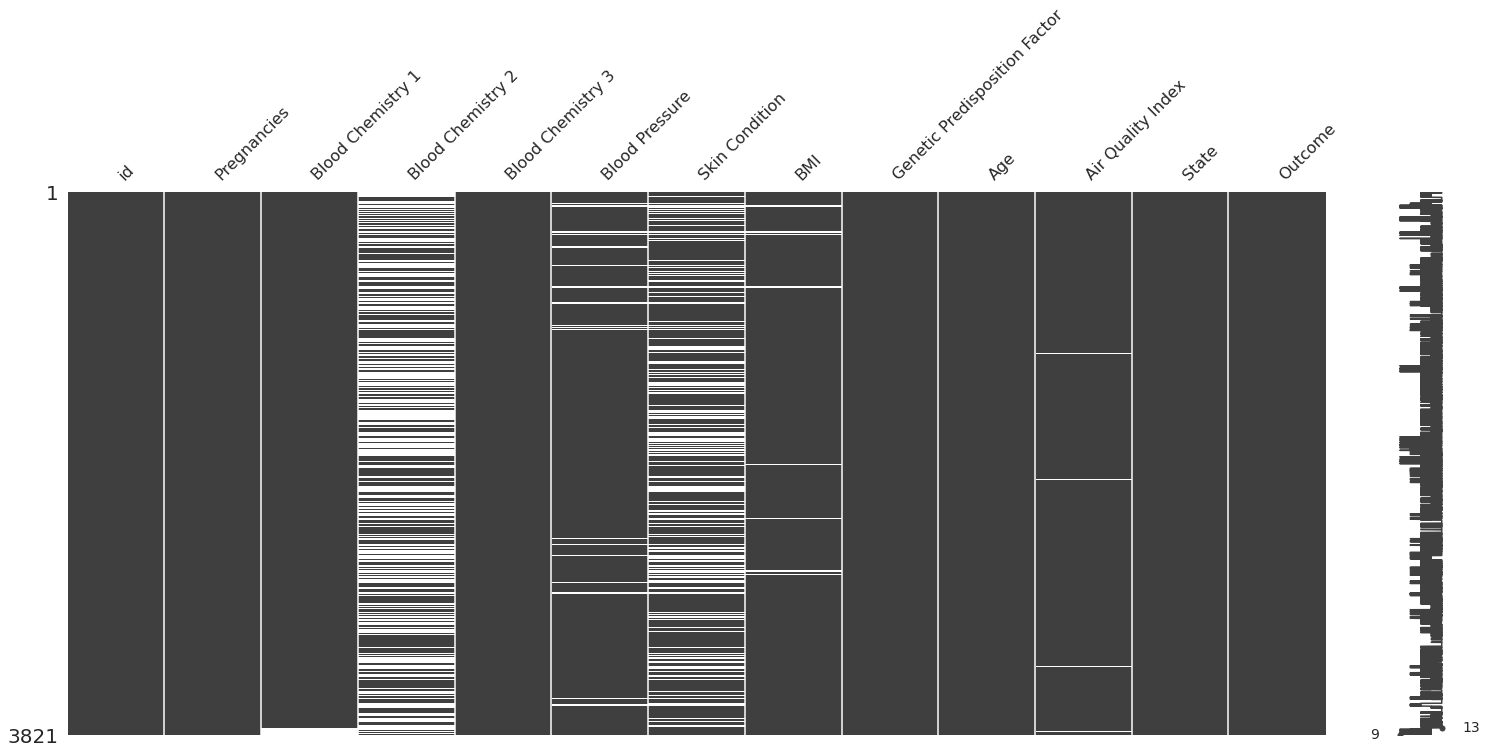

In [88]:
sorted = df.sort_values('Blood Chemistry 1')
msno.matrix(sorted)

There is no correlation between these missing values and others.

Let's check also the Blood Chemistry 2.

<AxesSubplot:>

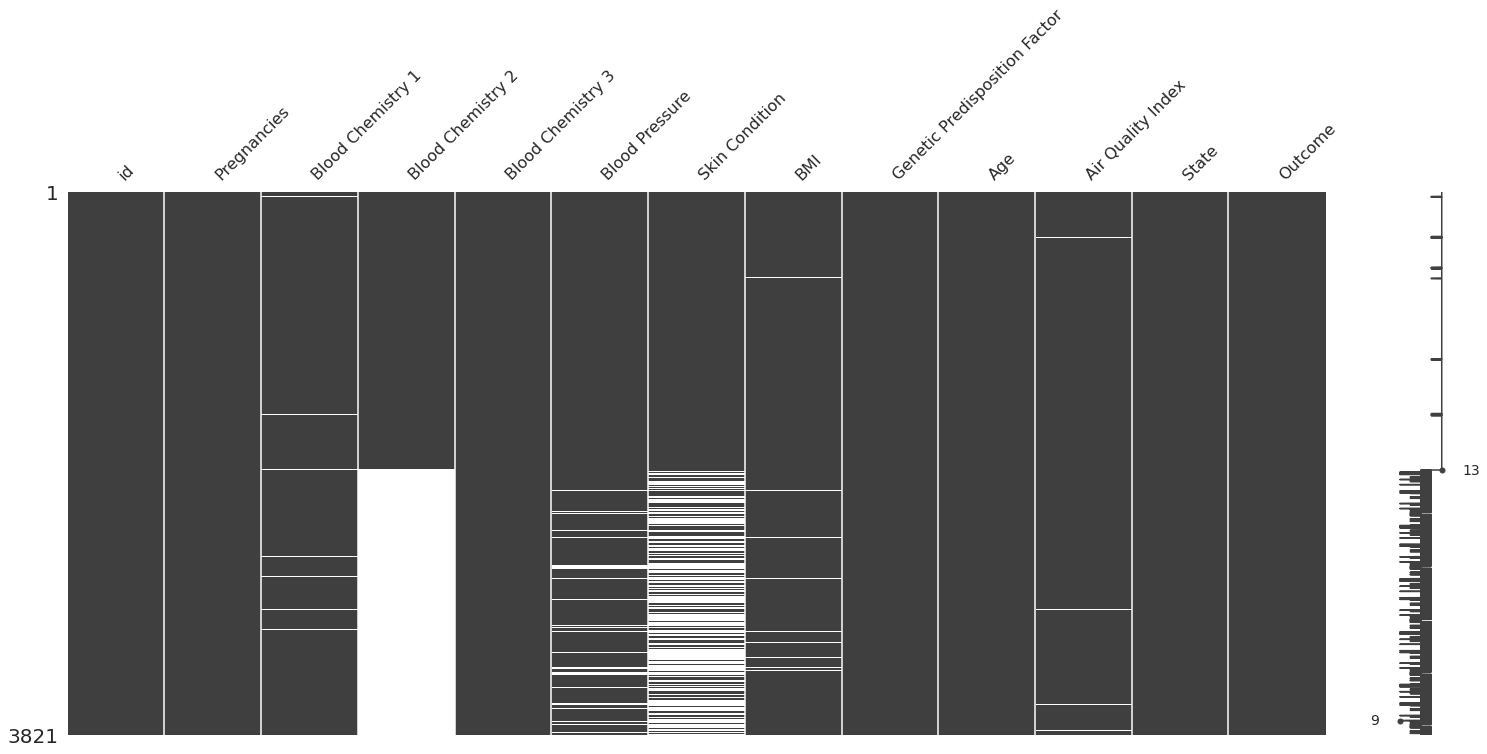

In [89]:
sorted = df.sort_values('Blood Chemistry 2')
msno.matrix(sorted)

We can see a clear correlation with Skin Condition's missing values.

Now, Blood Pressure.

<AxesSubplot:>

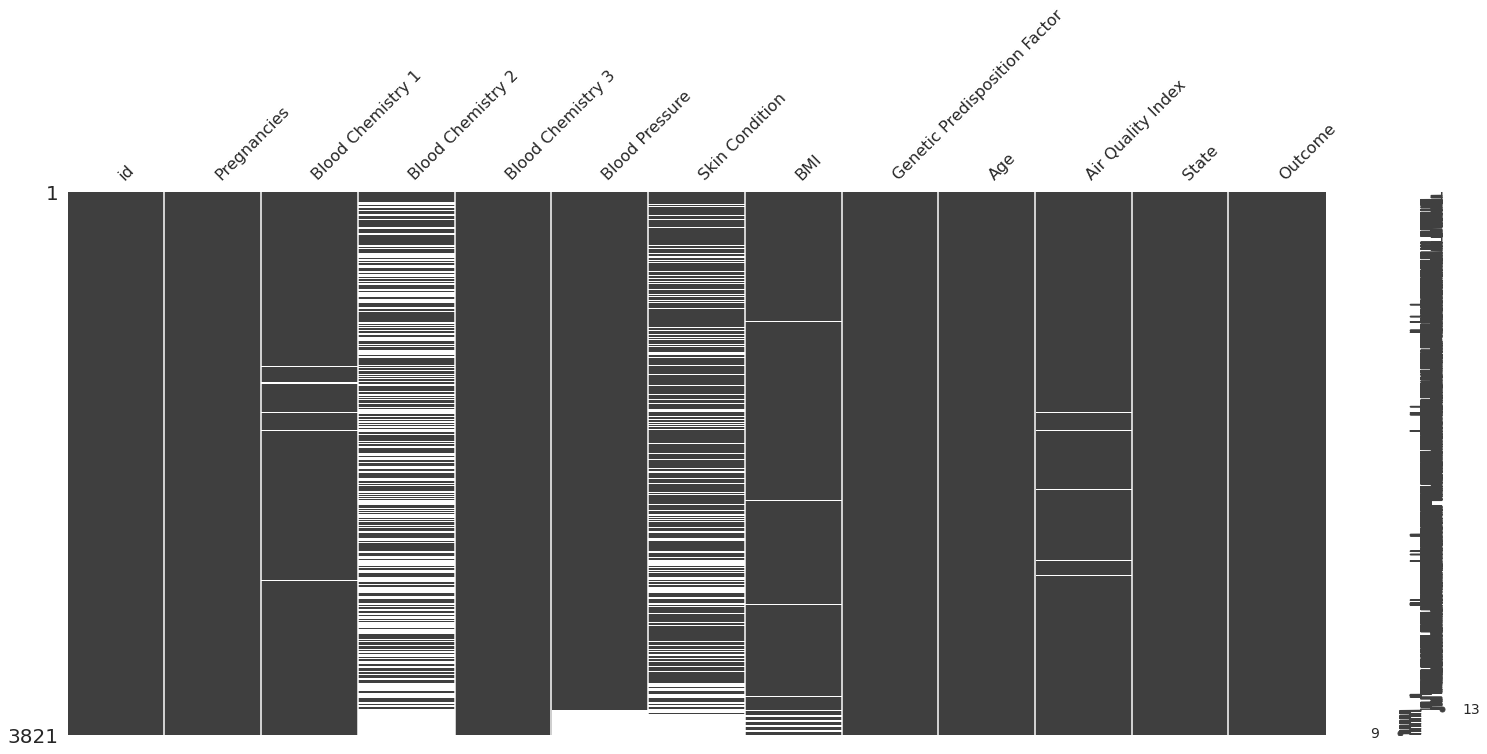

In [90]:
sorted = df.sort_values('Blood Pressure')
msno.matrix(sorted)

There is correlation with Blood Chemistry 2 and Skin Condition, however since these two columns has a lot of more missing values, the association will not be on high level.

It's time for Skin Condition.

<AxesSubplot:>

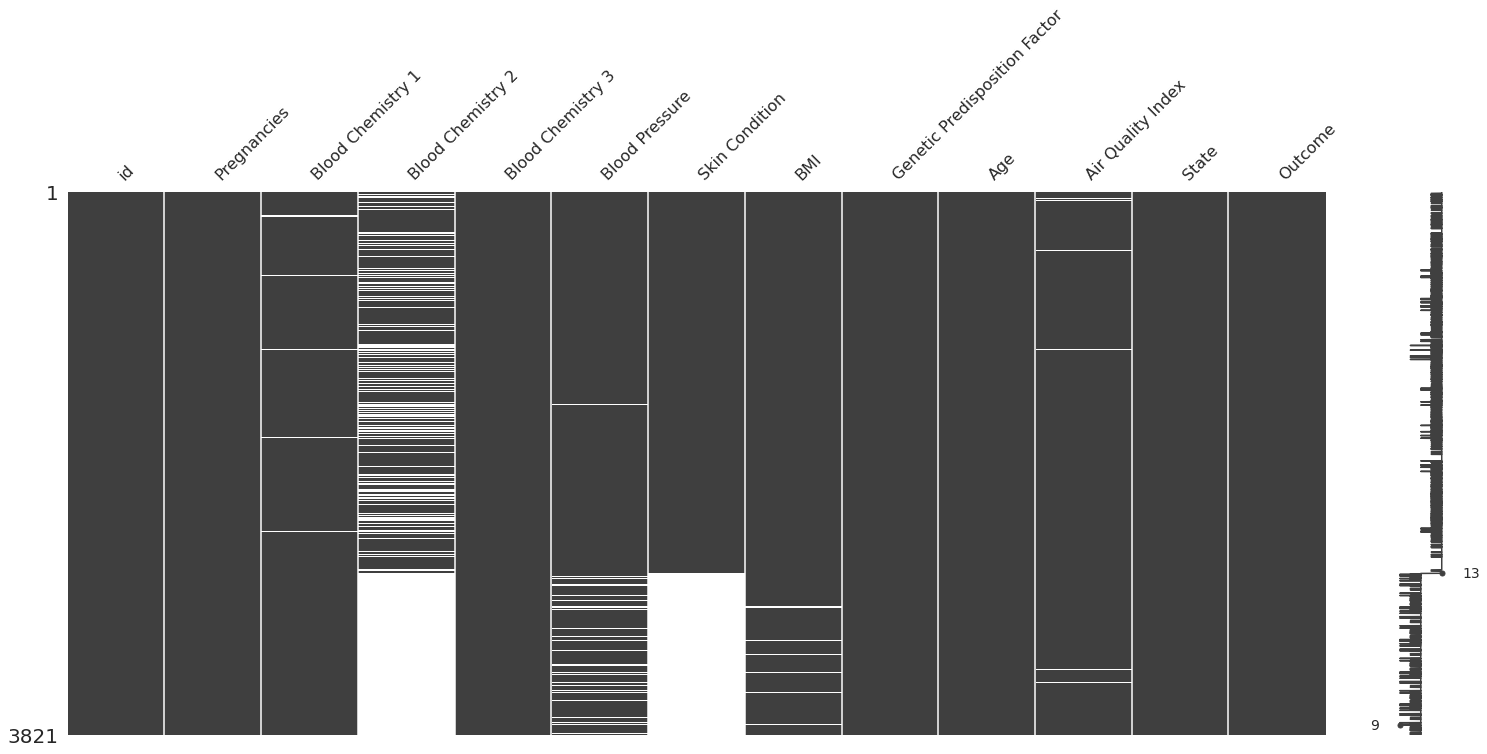

In [91]:
sorted = df.sort_values('Skin Condition')
msno.matrix(sorted)

There is no additional correlations.

Let's check BMI.

<AxesSubplot:>

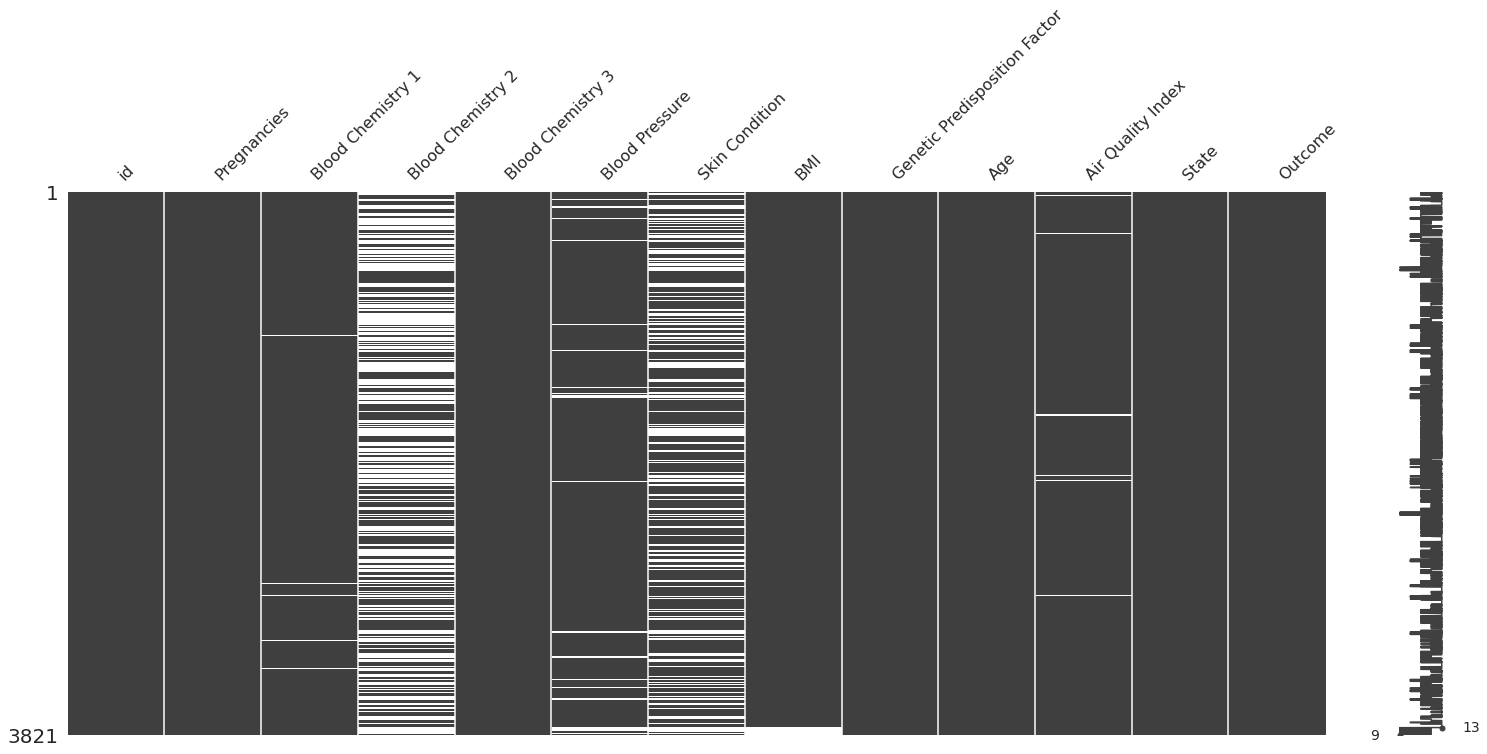

In [92]:
sorted = df.sort_values('BMI')
msno.matrix(sorted)

It;s hard to say, since there are a few missing values in the column, but correlation with Blood Pressure seems to be reliable.

It might be worth to check Air Quality Inde also.

<AxesSubplot:>

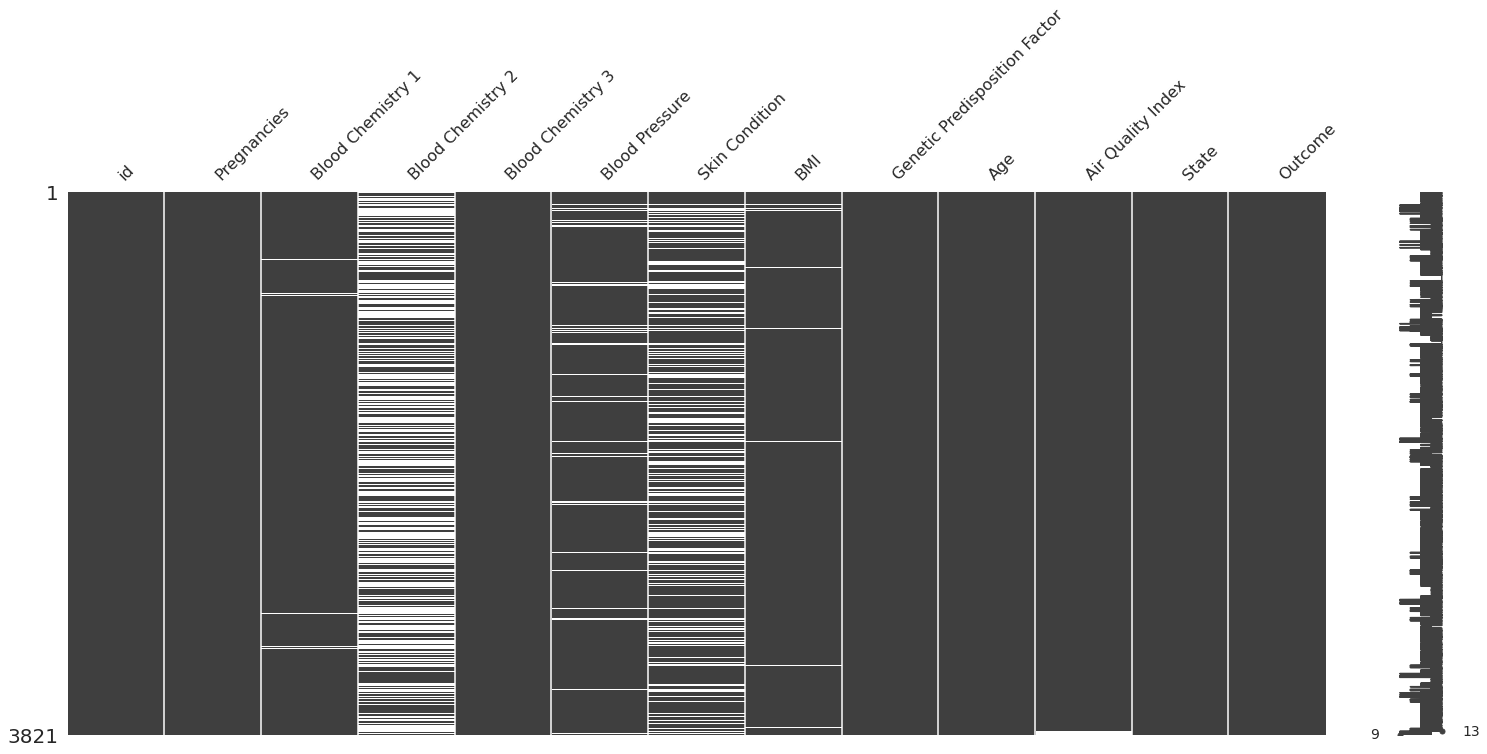

In [93]:
sorted = df.sort_values('Air Quality Index')
msno.matrix(sorted)

Rather small chance of any correlation.

Let's check the heatmap of missing values now.

<AxesSubplot:>

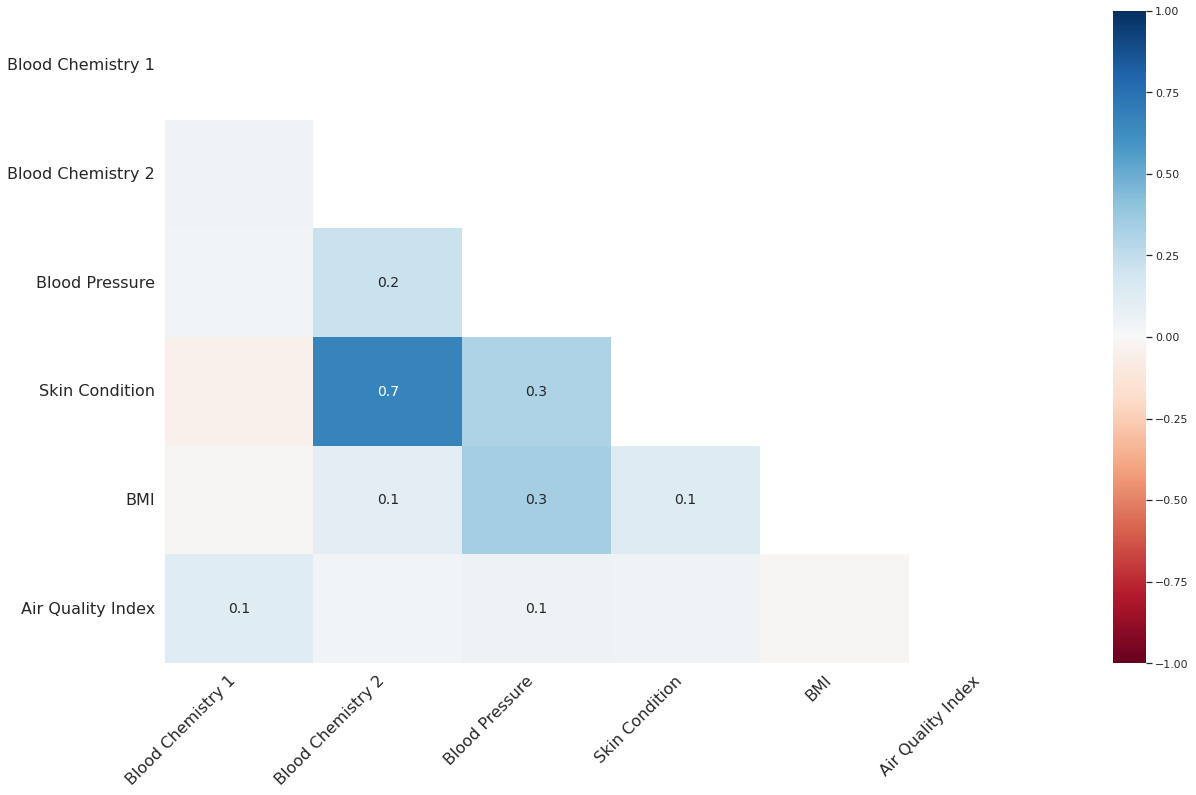

In [94]:
msno.heatmap(df)

As we can see there is a strong correlation between missing values from Blood Chemistry 2 and Skind Condition. That high correlation not necessarily indicate that its Missing at Random case. Blood Pressure missing values are weak correlated to BMI and Skin Condition, other correlations are irrelevant.

<h3> Finding reason for missing data using Dendrogram </h3>

<AxesSubplot:>

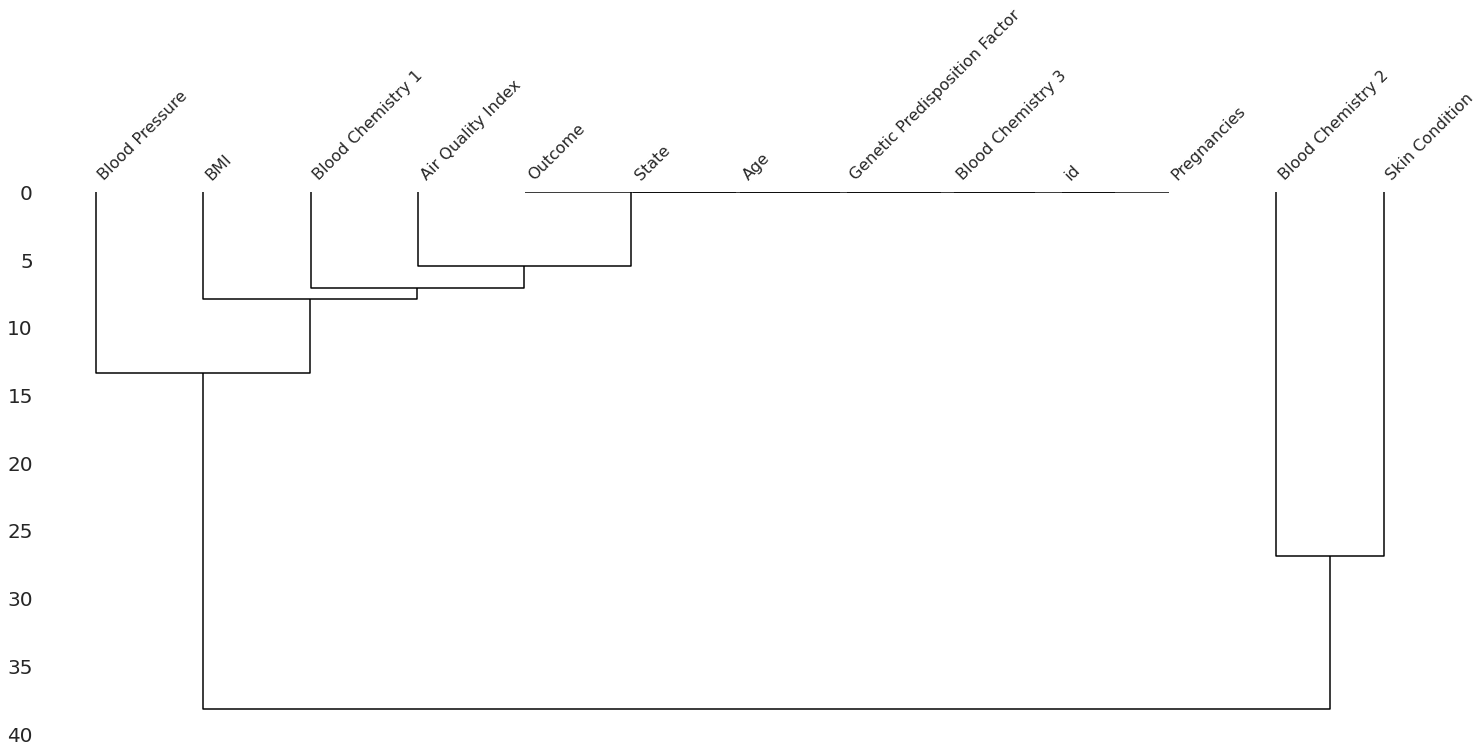

In [95]:
msno.dendrogram(df)

The dendrogram presents hierarchical clustering, grouping together columns that have a strong correlation and nullity.
If a group of columns is grouped together at level 0, it means that nulls (if exists) in one of these columns are directly correlated to presence or absence of nulles in the other columns. The more separated columns in the tree, the less corelation between nulls in columns.

In our case we can point out three groups: the first, from Outcome to Blood CHemistry 3, these columns has, indeed, no missing values. The second group is on the left, where columns closer to each other has higher missing values correlation, f.e. Blood Pressure missing values tends to be more similar to BMI than to Blood CHemistry 1, etc. The third, strong grup is on the right, which contains Blood Chemistry 2 and Skin Condition columns.

After a short considerations about missing values, it's time to tackle the main issue.

<h3> Looking for patterns </h3> 

<h4> Correlations </h4>

Let's check the correlations first.

In [96]:
df.corr()

,id,Pregnancies,Blood Chemistry 1,Blood Chemistry 2,Blood Chemistry 3,Blood Pressure,Skin Condition,BMI,Genetic Predisposition Factor,Age,Air Quality Index,Outcome
id,1.000000,0.209088,0.852061,0.520532,-0.015212,0.240964,0.274302,0.313298,0.167456,0.238363,0.022312,0.825464
Pregnancies,0.209088,1.000000,0.124960,0.083825,-0.013174,0.213036,0.107055,0.020145,-0.033799,0.448491,0.045542,0.220976
Blood Chemistry 1,0.852061,0.124960,1.000000,0.583581,-0.010606,0.221872,0.212297,0.235141,0.136592,0.210584,0.008228,0.493433
Blood Chemistry 2,0.520532,0.083825,0.583581,1.000000,0.000253,0.097756,0.186015,0.229360,0.128566,0.134879,-0.101224,0.305459
Blood Chemistry 3,-0.015212,-0.013174,-0.010606,0.000253,1.000000,-0.027731,-0.013645,0.020196,-0.005300,-0.016750,0.007524,-0.014112
Blood Pressure,0.240964,0.213036,0.221872,0.097756,-0.027731,1.000000,0.239502,0.287322,-0.002674,0.266352,0.035498,0.168591
Skin Condition,0.274302,0.107055,0.212297,0.186015,-0.013645,0.239502,1.000000,0.673457,0.121449,0.077806,0.023938,0.252383
BMI,0.313298,0.020145,0.235141,0.229360,0.020196,0.287322,0.673457,1.000000,0.156603,-0.020585,-0.008807,0.312918
Genetic Predisposition Factor,0.167456,-0.033799,0.136592,0.128566,-0.005300,-0.002674,0.121449,0.156603,1.000000,0.017979,0.010768,0.174559
Age,0.238363,0.448491,0.210584,0.134879,-0.016750,0.266352,0.077806,-0.020585,0.017979,1.000000,-0.013355,0.188144


Let's use the heatmap.

<AxesSubplot:>

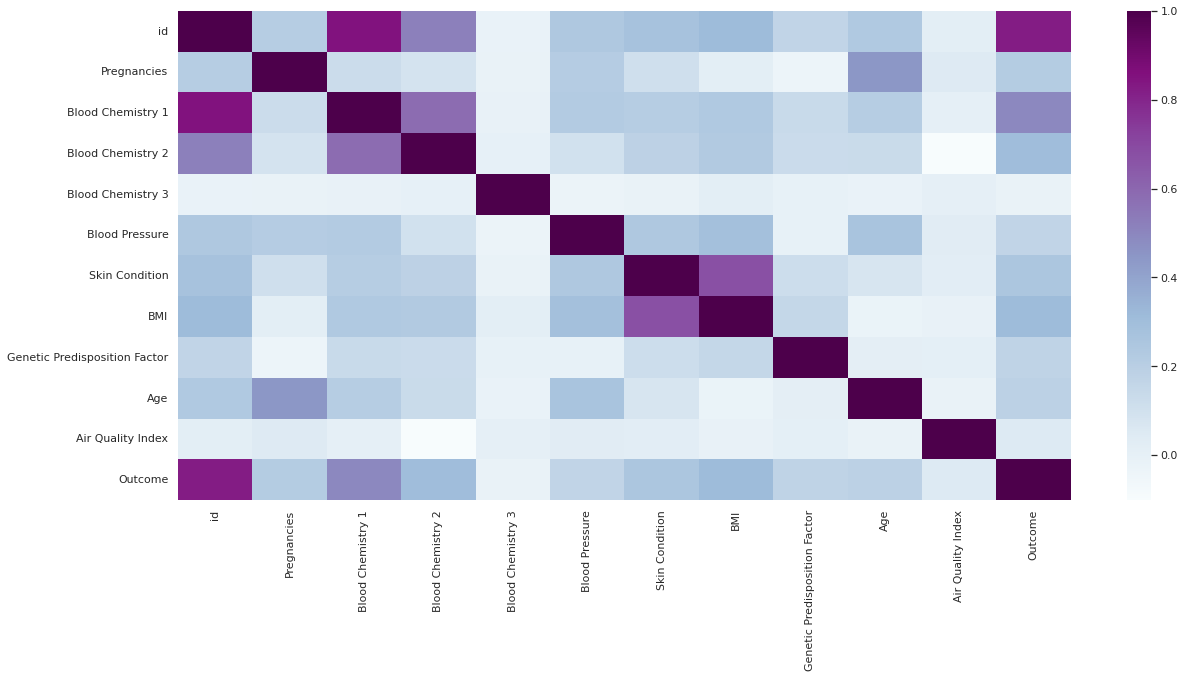

In [97]:
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap="BuPu")

Let's print the highest correlation pairs, with correlation above 0.3.

In [98]:
c = df.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")

choose = np.arange(12,26,2)
print(so[-choose])

id                 id                   1.000000
                   Blood Chemistry 1    0.852061
Outcome            id                   0.825464
BMI                Skin Condition       0.673457
Blood Chemistry 1  Blood Chemistry 2    0.583581
Blood Chemistry 2  id                   0.520532
Outcome            Blood Chemistry 1    0.493433
dtype: float64


It's worth to note that, a high correlation between id and Blood Chemistry 1, Outcome and Blood Chemistry 2 columns, means that for a single patient, values of these columns rather not changing between their corresponding rows. 

These are pairs of columns, which we should take into account while assessing the impact of features on disease risk. It is illustrative, because we did not check the assumptions of Pearson's collation, we can check f.e. the normal distribution assumption.

In [100]:
def shapiro_check_gaussian(col, df=df):
    print(col, ":")
    stat, p = stats.shapiro(df[col][df[col].notnull()])
    print( 'Statistics\n(W)= %e,\n p = %e' % ( stat, p ) )

    if p > 0.5:
        print('Probably Gaussian by shapiro')
    else:
        print('Probably not Gaussian by shapiro')
        
        
def normaltest_check_gaussian(col, df=df):
    print(col, ":")
    stat, p = stats.normaltest(df[col][df[col].notnull()])
    print( 'Statistics\n(W)= %e,\n p = %e' % ( stat, p ) )

    if p > 0.5:
        print('Probably Gaussian by normaltest')
    else:
        print('Probably not Gaussian by normaltest')

In [101]:
for col in df.columns:
    try:
        shapiro_check_gaussian(col)
        normaltest_check_gaussian(col)
    except:
        pass

id :
Statistics
(W)= 7.800843e-01,
 p = 0.000000e+00
Probably not Gaussian by shapiro
id :
Statistics
(W)= 3.230172e+03,
 p = 0.000000e+00
Probably not Gaussian by normaltest
Pregnancies :
Statistics
(W)= 9.039133e-01,
 p = 7.006492e-44
Probably not Gaussian by shapiro
Pregnancies :
Statistics
(W)= 3.900852e+02,
 p = 1.968196e-85
Probably not Gaussian by normaltest
Blood Chemistry 1 :
Statistics
(W)= 9.695410e-01,
 p = 1.370692e-27
Probably not Gaussian by shapiro
Blood Chemistry 1 :
Statistics
(W)= 1.741540e+02,
 p = 1.523811e-38
Probably not Gaussian by normaltest
Blood Chemistry 2 :
Statistics
(W)= 8.037511e-01,
 p = 1.261169e-43
Probably not Gaussian by shapiro
Blood Chemistry 2 :
Statistics
(W)= 8.952184e+02,
 p = 4.034620e-195
Probably not Gaussian by normaltest
Blood Chemistry 3 :
Statistics
(W)= 9.568486e-01,
 p = 3.096958e-32
Probably not Gaussian by shapiro
Blood Chemistry 3 :
Statistics
(W)= 2.635063e+03,
 p = 0.000000e+00
Probably not Gaussian by normaltest
Blood Pressure :

As we can see none of the columns meet the assumption. we won't check the correlation with other tests, let's just use a scatter plots.

<AxesSubplot:xlabel='Skin Condition', ylabel='BMI'>

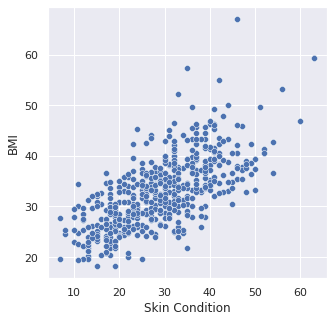

In [102]:
sns.set(rc={'figure.figsize':(5, 5)})
sns.scatterplot(data=df, x="Skin Condition", y="BMI")

Skin Condition increases with BMI.

<AxesSubplot:xlabel='Blood Chemistry 1', ylabel='Blood Chemistry 2'>

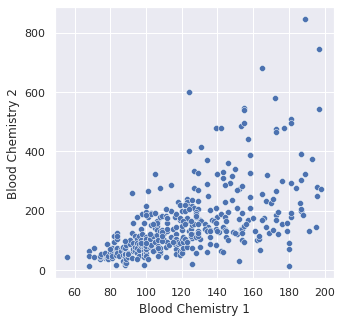

In [103]:
sns.set(rc={'figure.figsize':(5, 5)})
sns.scatterplot(data=df, x="Blood Chemistry 1", y="Blood Chemistry 2")

With increase of Blood Chemistry 1 and 2, variation increases.

<AxesSubplot:xlabel='Pregnancies', ylabel='Age'>

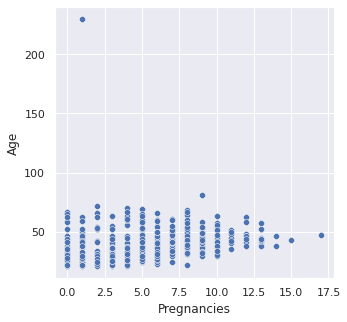

In [104]:
sns.set(rc={'figure.figsize':(5, 5)})
sns.scatterplot(data=df, x="Pregnancies", y="Age")

The older person, the more pregnancies possible.

<AxesSubplot:xlabel='Outcome', ylabel='Blood Chemistry 1'>

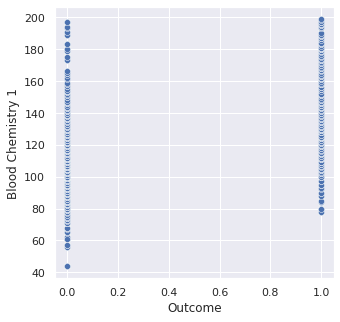

In [105]:
sns.set(rc={'figure.figsize':(5, 5)})
sns.scatterplot(data=df, x="Outcome", y="Blood Chemistry 1")

Below Blood Chemistry 1 around 80, there is no disease cases.

<AxesSubplot:xlabel='Age', ylabel='Blood Pressure'>

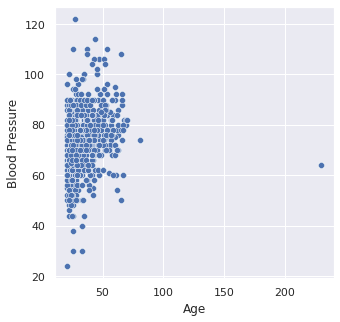

In [106]:
sns.set(rc={'figure.figsize':(5, 5)})
sns.scatterplot(data=df, x="Age", y="Blood Pressure")

Older people have rather higher blood pressure.

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

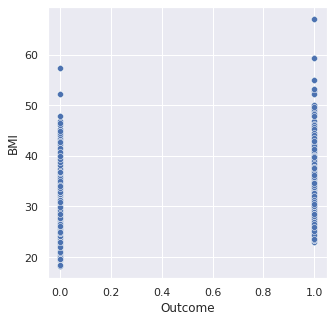

In [107]:
sns.set(rc={'figure.figsize':(5, 5)})
sns.scatterplot(data=df, x="Outcome", y="BMI")

There is no cases of disease for people with rather healthy BMI.

<AxesSubplot:xlabel='Outcome', ylabel='Blood Chemistry 2'>

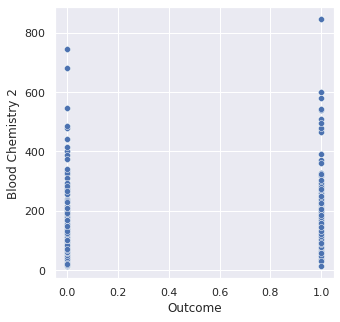

In [108]:
sns.set(rc={'figure.figsize':(5, 5)})
sns.scatterplot(data=df, x="Outcome", y="Blood Chemistry 2")

Here, the potential correlation is not clear.

<h4> Patterns </h4>

Let's take a closer look at the data, using stacked vertical bar charts.

Let's see Pregnancies firts.

<AxesSubplot:xlabel='Pregnancies', ylabel='Count'>

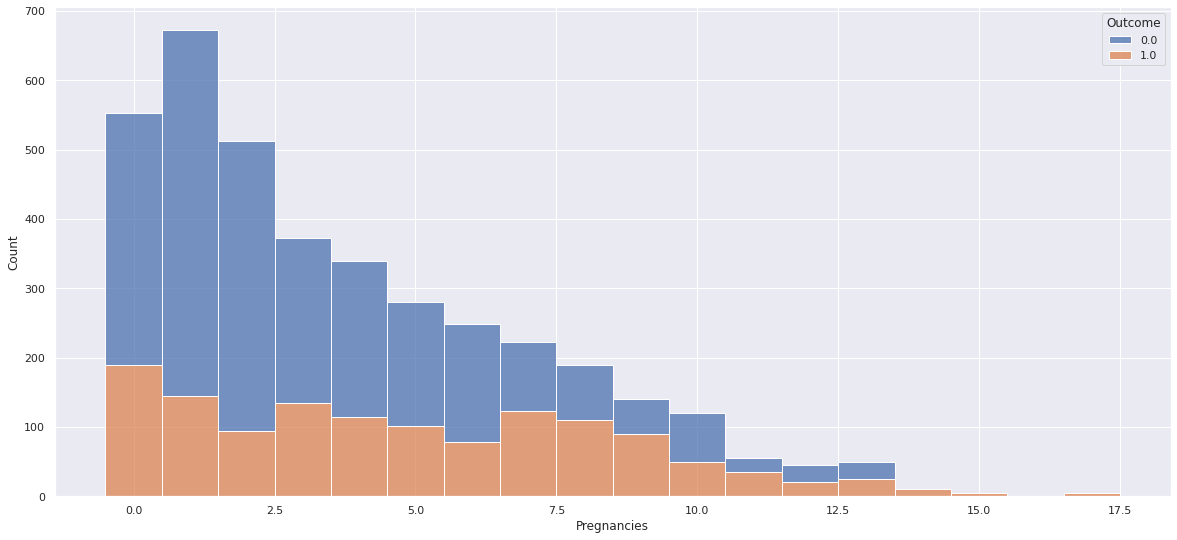

In [109]:
sns.set(rc={'figure.figsize':(20,9)})

sns.histplot(data=df, x='Pregnancies', hue='Outcome', discrete=True, multiple='stack')

It looks like since 7 pregnancies the risk is higher. 

In [110]:
df.groupby(['Pregnancies', 'Outcome']).count()['BMI']

Pregnancies  Outcome
0.0          0.0        348
             1.0        190
1.0          0.0        527
             1.0        145
2.0          0.0        409
             1.0         94
3.0          0.0        233
             1.0        134
4.0          0.0        225
             1.0        115
5.0          0.0        173
             1.0        102
6.0          0.0        165
             1.0         79
7.0          0.0         94
             1.0        123
8.0          0.0         80
             1.0        105
9.0          0.0         50
             1.0         90
10.0         0.0         70
             1.0         45
11.0         0.0         20
             1.0         35
12.0         0.0         25
             1.0         20
13.0         0.0         25
             1.0         25
14.0         1.0         10
15.0         1.0          5
17.0         1.0          5
Name: BMI, dtype: int64

In [111]:
values = df.groupby(['Pregnancies', 'Outcome']).count()['BMI'].values

In [112]:
percentages = [0] * 15
for i in range(0, len(values)-4, 2):
    
    percentages[int(i/2)] = values[i+1] / (values[i] + values[i+1])
    
percentages[-1] = 1
percentages

[0.35315985130111527,
 0.21577380952380953,
 0.18687872763419483,
 0.3651226158038147,
 0.3382352941176471,
 0.3709090909090909,
 0.3237704918032787,
 0.5668202764976958,
 0.5675675675675675,
 0.6428571428571429,
 0.391304347826087,
 0.6363636363636364,
 0.4444444444444444,
 0.5,
 1]

In [113]:
data = {'Value': percentages, 'Pregnancies': ['0', '1', '2', '3', '4',
                                             '5', '6', '7', '8', '9',
                                             '10', '11', '12', '13', '14 and more']}

pd.DataFrame.from_dict(data)

,Value,Pregnancies
0,0.353160,0
1,0.215774,1
2,0.186879,2
3,0.365123,3
4,0.338235,4
5,0.370909,5
6,0.323770,6
7,0.566820,7
8,0.567568,8
9,0.642857,9


<AxesSubplot:xlabel='Pregnancies', ylabel='Value'>

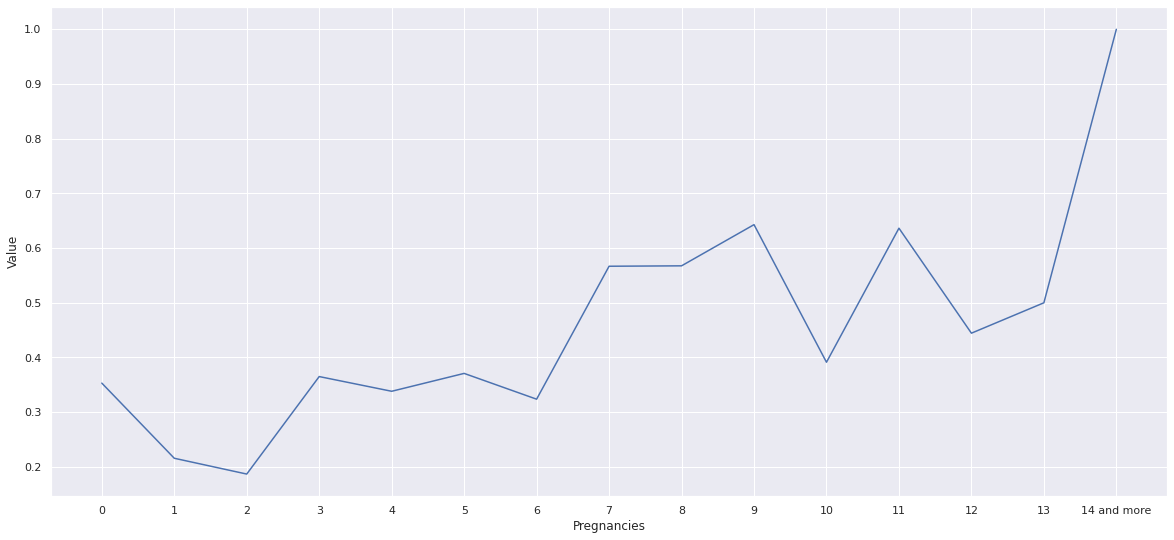

In [114]:
sns.lineplot(data=data, x="Pregnancies", y="Value")

It looks like since 7 pregnancies the risk is higher, but it might be desribed by age only, which is correlated with pregnancies feature. For 14 and more pregnancies we had 100%, but we are almost sure that the increase shouldn't be that big. It's just because the specific entries in data.

Let's do the same for groups "less than 7" and "7 and more".

In [115]:
def Pregnancies_groups2(row):
    if row['Pregnancies'] < 7:
        return 'less than 7'
    return '7 and more'


df['Pregnancies_groups2'] = df.apply(lambda row: Pregnancies_groups2(row), axis=1)

In [116]:
values = df.groupby(['Pregnancies_groups2', 'Outcome']).count()['Pregnancies'].values

In [117]:
df.groupby(['Pregnancies_groups2', 'Outcome']).count()['Pregnancies']

Pregnancies_groups2  Outcome
7 and more           0.0         369
                     1.0         473
less than 7          0.0        2120
                     1.0         859
Name: Pregnancies, dtype: int64

In [118]:
percentages = [0] * 2

for i in range(0, len(values)-1, 2):
    
    percentages[int(i/2)] = values[i+1] / (values[i] + values[i+1])
percentages

[0.5617577197149644, 0.288351795904666]

In [119]:
labels = ['7 and more', 'less than 7']

In [120]:
data_pregnancies = {'Average Risk': percentages, 'Pregnancies': labels}
data_pregnancies = pd.DataFrame.from_dict(data_pregnancies)

HTML(data_pregnancies.to_html(index=False))

Average Risk,Pregnancies
0.561758,7 and more
0.288352,less than 7


Now, let's analyze age.

<AxesSubplot:xlabel='Age', ylabel='Count'>

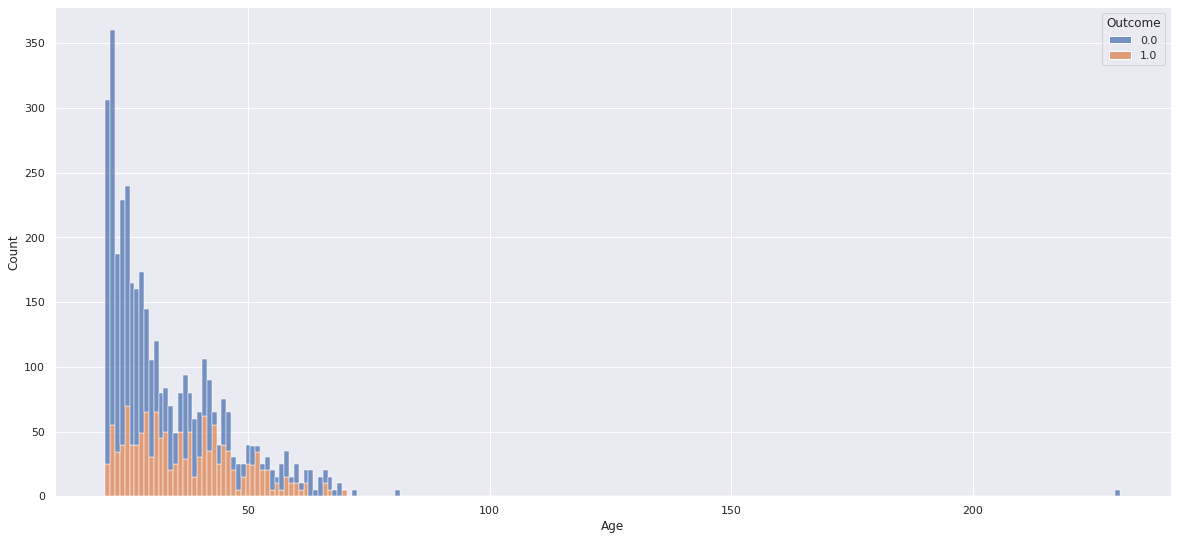

In [121]:
sns.set(rc={'figure.figsize':(20,9)})

sns.histplot(data=df, x='Age', hue='Outcome', discrete=True, multiple='stack')

As we can see, age also makes risk higher. However, at age around 60 sitauation changes. Let's plot it better.

In [122]:
def Age_groups5(row):
    if row['Age'] >= 20 and row['Age'] < 25:
        return '20-24'
    elif row['Age'] >= 25 and row['Age'] < 30:
        return '25-29'
    if row['Age'] >= 30 and row['Age'] < 35:
        return '30-34'
    if row['Age'] >= 35 and row['Age'] < 40:
        return '35-39'
    if row['Age'] >= 40 and row['Age'] < 45:
        return '40-44'
    elif row['Age'] >= 45 and row['Age'] < 50:
        return '45-49'
    if row['Age'] >= 50 and row['Age'] < 55:
        return '50-54'
    if row['Age'] >= 55 and row['Age'] < 60:
        return '55-59'
    return '60+'


df['Age group5'] = df.apply(lambda row: Age_groups5(row), axis=1)

In [123]:
df.groupby(['Age group5', 'Outcome']).count()['BMI']

Age group5  Outcome
20-24       0.0        898
            1.0        154
25-29       0.0        609
            1.0        264
30-34       0.0        249
            1.0        205
35-39       0.0        194
            1.0        169
40-44       0.0        159
            1.0        207
45-49       0.0        105
            1.0        115
50-54       0.0         50
            1.0        118
55-59       0.0         65
            1.0         45
60+         0.0        115
            1.0         45
Name: BMI, dtype: int64

In [124]:
values = df.groupby(['Age group5', 'Outcome']).count()['BMI'].values

In [125]:
labels = df.groupby(['Age group5']).count()['BMI'].index

In [126]:
percentages = [0] * 9
for i in range(0, len(values)-1, 2):
    
    percentages[int(i/2)] = values[i+1] / (values[i] + values[i+1])
    
percentages

[0.14638783269961977,
 0.3024054982817869,
 0.45154185022026433,
 0.465564738292011,
 0.5655737704918032,
 0.5227272727272727,
 0.7023809523809523,
 0.4090909090909091,
 0.28125]

In [127]:
data_age = {'Average Risk': percentages, 'Age': labels}

pd.DataFrame.from_dict(data_age)

,Average Risk,Age
0,0.146388,20-24
1,0.302405,25-29
2,0.451542,30-34
3,0.465565,35-39
4,0.565574,40-44
5,0.522727,45-49
6,0.702381,50-54
7,0.409091,55-59
8,0.281250,60+


<AxesSubplot:xlabel='Age', ylabel='Average Risk'>

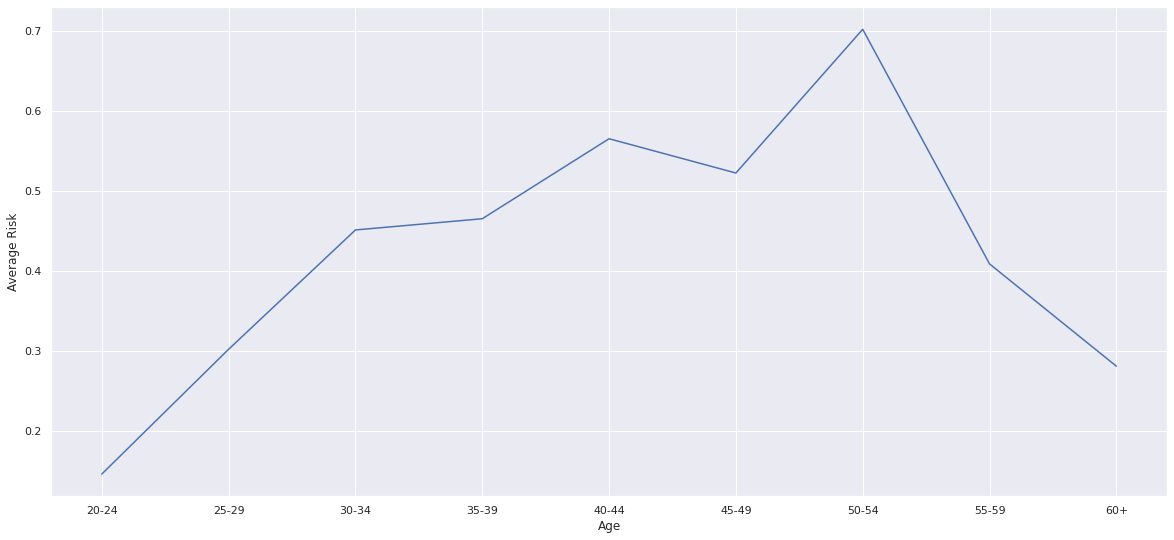

In [128]:
sns.lineplot(data=data_age, x="Age", y="Average Risk")

Now we can clearly see the drop around the age 50. This is an average age of women menopause. Possibly this is the factor that changes the risk level dramatically.

Let's check if both featuers have an impact on the risk.

In [129]:
def Pregnancies_groups(row):  
    if row['Pregnancies'] < 7:
        return 'less than 7'
    return '7 and more'

In [130]:
df['Pregnancies group'] = df.apply(lambda row: Pregnancies_groups(row), axis=1)

In [131]:
def Age_groups(row):
    if row['Age'] >= 20 and row['Age'] < 30:
        return '20-29'
    elif row['Age'] >= 30 and row['Age'] < 40:
        return '30-39'
    if row['Age'] >= 40 and row['Age'] < 50:
        return '40-49'
    if row['Age'] >= 50 and row['Age'] < 60:
        return '50-59'
    return '60+'


df['Age group'] = df.apply(lambda row: Age_groups(row), axis=1)

In [132]:
labels = df.groupby(['Pregnancies group', 'Age group']).count()['BMI'].index
values = df.groupby(['Pregnancies group', 'Age group']).count()['BMI'].values

In [133]:
labels = df.groupby(['Pregnancies group', 'Age group', 'Outcome']).count()['BMI'].index
values = df.groupby(['Pregnancies group', 'Age group', 'Outcome']).count()['BMI'].values

In [134]:
df.groupby(['Pregnancies group', 'Age group', 'Outcome']).count()['BMI']

Pregnancies group  Age group  Outcome
7 and more         20-29      0.0           5
                              1.0          15
                   30-39      0.0         115
                              1.0         140
                   40-49      0.0         134
                              1.0         223
                   50-59      0.0          70
                              1.0          80
                   60+        0.0          40
                              1.0           5
less than 7        20-29      0.0        1502
                              1.0         403
                   30-39      0.0         328
                              1.0         234
                   40-49      0.0         130
                              1.0          99
                   50-59      0.0          45
                              1.0          83
                   60+        0.0          75
                              1.0          40
Name: BMI, dtype: int64

In [135]:
percentages = [0] * 10
for i in range(0, len(values)-1, 2):
    
    percentages[int(i/2)] = values[i+1] / (values[i] + values[i+1])
    
percentages

[0.75,
 0.5490196078431373,
 0.6246498599439776,
 0.5333333333333333,
 0.1111111111111111,
 0.2115485564304462,
 0.41637010676156583,
 0.43231441048034935,
 0.6484375,
 0.34782608695652173]

In [136]:
data = {'Value': percentages, '7moreless': ['7 and more', '7 and more',
                                            '7 and more', '7 and more',
                                            '7 and more', 'less than 7',
                                            'less than 7', 'less than 7',
                                            'less than 7', 'less than 7'], 'Age':['20-29', '30-39', '40-49', '50-59', '60+']*2}

pd.DataFrame.from_dict(data)

,Value,7moreless,Age
0,0.750000,7 and more,20-29
1,0.549020,7 and more,30-39
2,0.624650,7 and more,40-49
3,0.533333,7 and more,50-59
4,0.111111,7 and more,60+
5,0.211549,less than 7,20-29
6,0.416370,less than 7,30-39
7,0.432314,less than 7,40-49
8,0.648438,less than 7,50-59
9,0.347826,less than 7,60+


<AxesSubplot:xlabel='Age', ylabel='Value'>

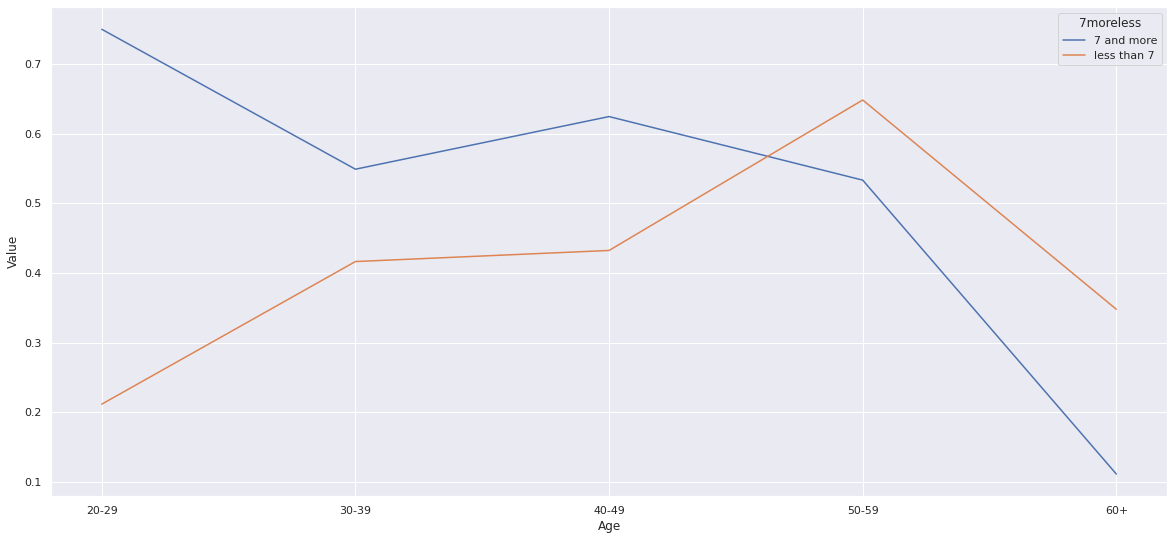

In [137]:
sns.lineplot(data=data, x="Age", y="Value", hue="7moreless")

We can see that Pregnancies also have an impact. In the age 20-29 the risk for women with 7 and more pregnancies is much higher than for others. With age first risk level desreases, when second increases to a similar level around 55%. Then risk dramatically decrease for both cases. Important thing to note is the difference in risk for 20-29 age interval.

In [138]:
data_pregnancy_age = data = {'Average Risk': [0.75, 0.21], 'Age':['20-29', '20-29'], 'Pregnancies':['7 and more', 'less than 7']}
data_pregnancy_age = pd.DataFrame.from_dict(data_pregnancy_age)
data_pregnancy_age

,Average Risk,Age,Pregnancies
0,0.75,20-29,7 and more
1,0.21,20-29,less than 7


It's time for Blood Chemistries.

<AxesSubplot:xlabel='Blood Chemistry 1', ylabel='Count'>

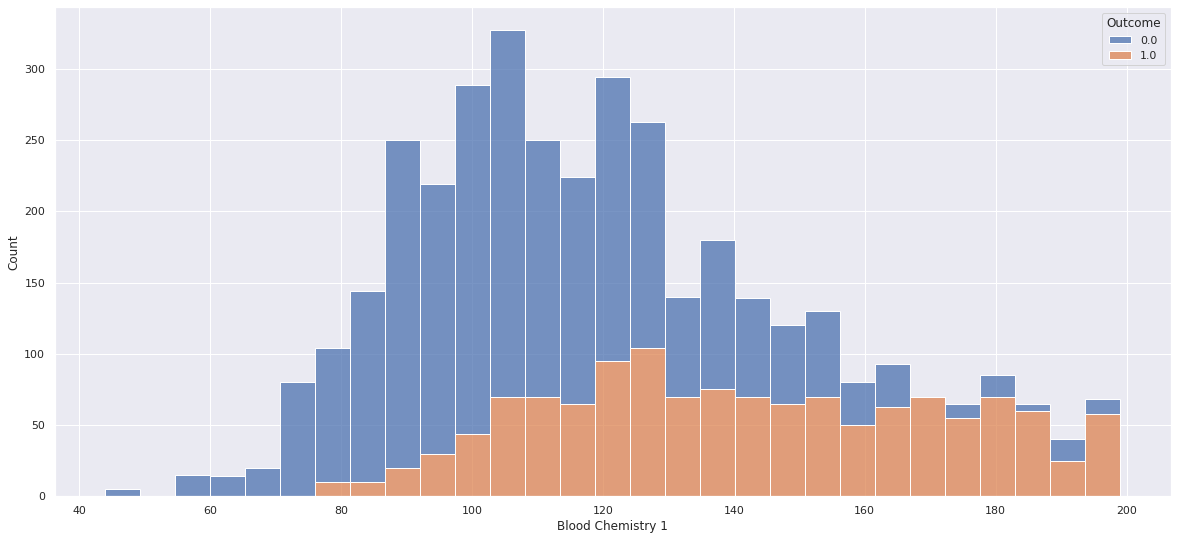

In [139]:
sns.set(rc={'figure.figsize':(20,9)})
data = df[~df['Blood Chemistry 1'].isnull()]
sns.histplot(data=data, x='Blood Chemistry 1', hue='Outcome', discrete=False, multiple='stack')

We can see the unluckily 0's again. However the more important thing is that it seems that the higher value of the measurement is, the higher the risk is (since the 75 value).

Let's create lineplot again.

In [140]:
df.groupby(['Blood Chemistry 1', 'Outcome']).count()['BMI']

Blood Chemistry 1  Outcome
44.0               0.0         5
56.0               0.0         5
57.0               0.0        10
61.0               0.0         5
62.0               0.0         4
                              ..
196.0              1.0        13
197.0              0.0         5
                   1.0        15
198.0              1.0         5
199.0              1.0         5
Name: BMI, Length: 213, dtype: int64

In [141]:
def BCH1_groups(row):
    if row['Blood Chemistry 1'] == 0:
        return '0'
    elif row['Blood Chemistry 1'] >= 1 and row['Blood Chemistry 1'] < 75:
        return '001-75'
    if row['Blood Chemistry 1'] >= 76 and row['Blood Chemistry 1'] < 100:
        return '076-100'
    if row['Blood Chemistry 1'] >= 101 and row['Blood Chemistry 1'] < 125:
        return '101-125'
    if row['Blood Chemistry 1'] >= 126 and row['Blood Chemistry 1'] < 150:
        return '126-150'
    if row['Blood Chemistry 1'] >= 151 and row['Blood Chemistry 1'] < 175:
        return '151-175'
    if row['Blood Chemistry 1'] >= 176 and row['Blood Chemistry 1'] < 200:
        return '176-200'

df['BCH1 group'] = df.apply(lambda row: BCH1_groups(row), axis=1)

In [142]:
df.groupby(['BCH1 group', 'Outcome']).count()['BMI']

BCH1 group  Outcome
001-75      0.0        109
076-100     0.0        737
            1.0         70
101-125     0.0        860
            1.0        319
126-150     0.0        409
            1.0        344
151-175     0.0        125
            1.0        288
176-200     0.0         45
            1.0        228
Name: BMI, dtype: int64

In [143]:
labels = ['1-75', '76-100', '101-125', '126-150', '151-175', '176-200']
values = df.groupby(['BCH1 group', 'Outcome']).count()['BMI'].values
values = list(values)

In [144]:
values.insert(1, 0)
values

[109, 0, 737, 70, 860, 319, 409, 344, 125, 288, 45, 228]

In [145]:
percentages = [0] * 6
percentages[0] = 0
for i in range(2, len(values)-1, 2):
    
    percentages[int(i/2)] = values[i+1] / (values[i] + values[i+1])
percentages

[0,
 0.08674101610904585,
 0.27056827820186596,
 0.45683930942895085,
 0.6973365617433414,
 0.8351648351648352]

In [146]:
data_BCH1 = {'Average Risk': percentages, 'Blood Chemistry 1': labels}

data_BCH1 = pd.DataFrame.from_dict(data_BCH1)

<AxesSubplot:xlabel='Blood Chemistry 1', ylabel='Average Risk'>

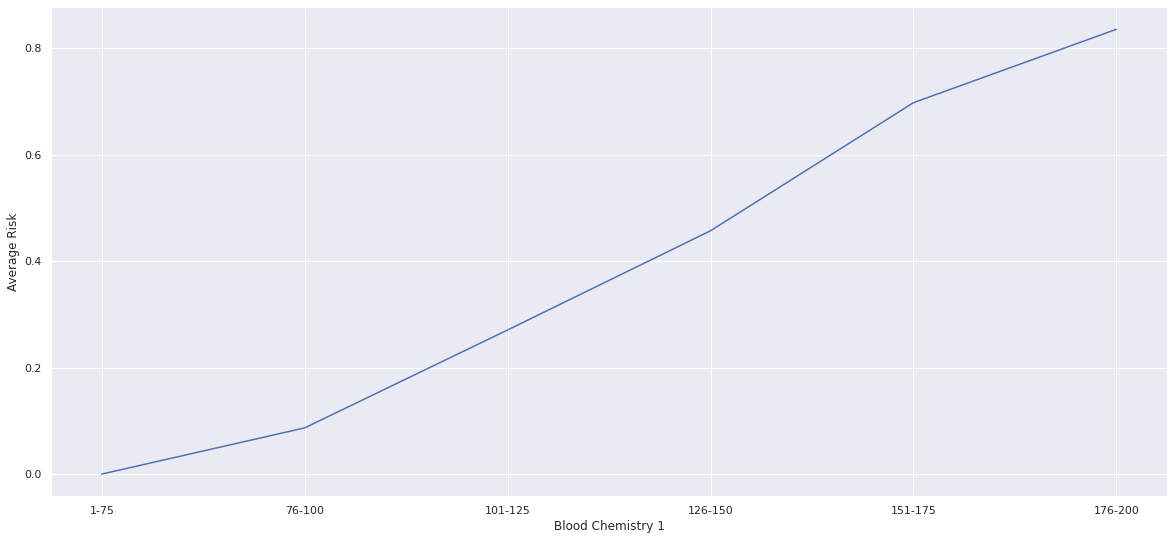

In [147]:
sns.lineplot(data=data_BCH1, x="Blood Chemistry 1", y="Average Risk")

[Text(0, 0, '0'),
 Text(0, 0, '0.086741'),
 Text(0, 0, '0.270568'),
 Text(0, 0, '0.456839'),
 Text(0, 0, '0.697337'),
 Text(0, 0, '0.835165')]

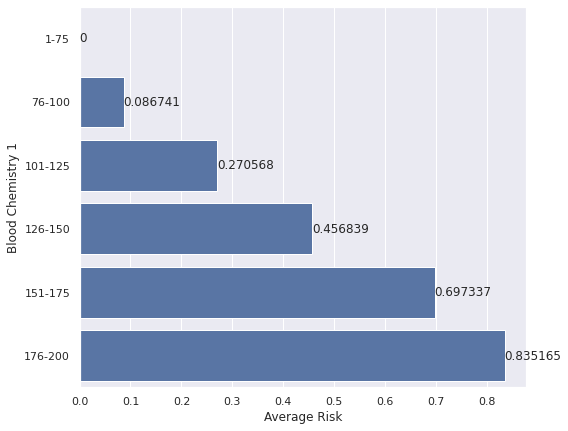

In [148]:
f, ax = plt.subplots(figsize=(8, 7))

ax = sns.barplot(data=data_BCH1, y="Blood Chemistry 1", x="Average Risk", color="b",
                 errwidth=0)
 
ax.bar_label(ax.containers[0])

It's worth to note 0% for interval 1-75, and gradual increase of risk up to around 84%.

Let's check Blood Chemistry 2.

<AxesSubplot:xlabel='Blood Chemistry 2', ylabel='Count'>

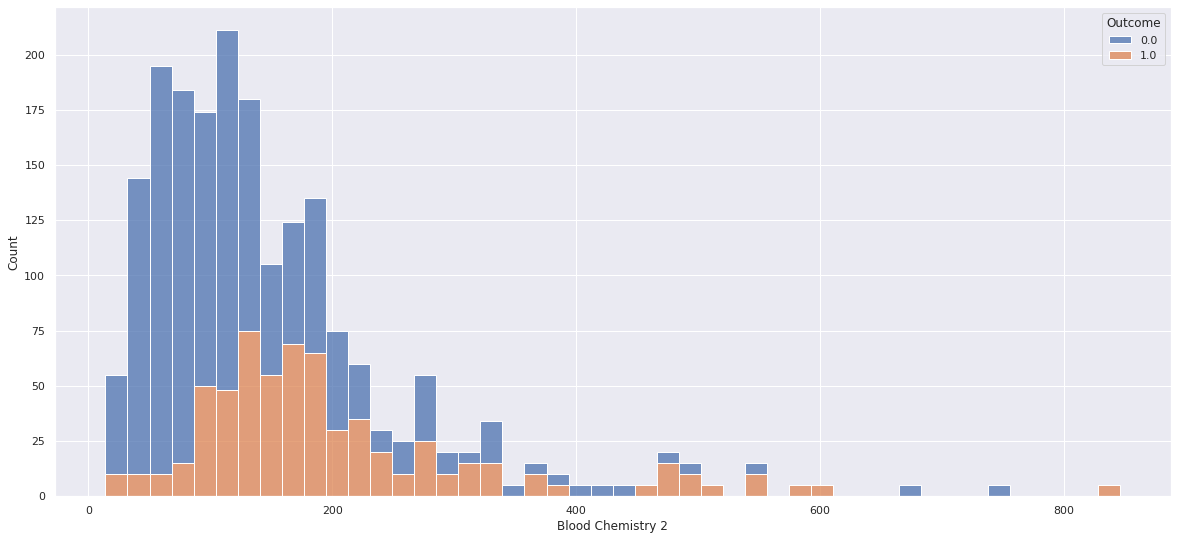

In [149]:
sns.set(rc={'figure.figsize':(20,9)})
data = df[~df['Blood Chemistry 2'].isnull()]
sns.histplot(data=data, x='Blood Chemistry 2', hue='Outcome', discrete=False, multiple='stack')

In [150]:
df.groupby(['Blood Chemistry 2', 'Outcome']).count()['BMI']

Blood Chemistry 2  Outcome
14.0               1.0         5
15.0               0.0         5
16.0               0.0         5
18.0               0.0        10
22.0               0.0         5
                              ..
579.0              1.0         5
600.0              1.0         5
680.0              0.0         5
744.0              0.0         5
846.0              1.0         5
Name: BMI, Length: 228, dtype: int64

In [151]:
def BCH2_groups(row):
    if row['Blood Chemistry 2'] >= 1 and row['Blood Chemistry 2'] < 50:
        return '001-49'
    elif row['Blood Chemistry 2'] >= 50 and row['Blood Chemistry 2'] < 100:
        return '050-99'
    if row['Blood Chemistry 2'] >= 100 and row['Blood Chemistry 2'] < 150:
        return '100-149'
    if row['Blood Chemistry 2'] >= 150 and row['Blood Chemistry 2'] < 200:
        return '150-199'
    if row['Blood Chemistry 2'] >= 200 and row['Blood Chemistry 2'] < 250:
        return '200-249'
    if row['Blood Chemistry 2'] >= 250 and row['Blood Chemistry 2'] < 300:
        return '250-299'
    if row['Blood Chemistry 2'] >= 300 and row['Blood Chemistry 2'] < 350:
        return '300-349'
    return '350+'

df['BCH2 group'] = df.apply(lambda row: BCH2_groups(row), axis=1)

In [152]:
df.groupby(['BCH2 group', 'Outcome']).count()['BMI']

BCH2 group  Outcome
001-49      0.0         164
            1.0          20
050-99      0.0         458
            1.0          70
100-149     0.0         318
            1.0         148
150-199     0.0         160
            1.0         169
200-249     0.0          75
            1.0          85
250-299     0.0          55
            1.0          40
300-349     0.0          29
            1.0          35
350+        0.0        1185
            1.0         755
Name: BMI, dtype: int64

In [153]:
labels = df.groupby(['BCH2 group']).count()['BMI'].index
values = df.groupby(['BCH2 group', 'Outcome']).count()['BMI'].values

percentages = [0] * 8

for i in range(0, len(values)-1, 2):
    
    percentages[int(i/2)] = values[i+1] / (values[i] + values[i+1])
percentages

[0.10869565217391304,
 0.13257575757575757,
 0.31759656652360513,
 0.513677811550152,
 0.53125,
 0.42105263157894735,
 0.546875,
 0.38917525773195877]

In [154]:
data = {'Value': percentages, 'BCH2 group': labels}

pd.DataFrame.from_dict(data)

,Value,BCH2 group
0,0.108696,001-49
1,0.132576,050-99
2,0.317597,100-149
3,0.513678,150-199
4,0.531250,200-249
5,0.421053,250-299
6,0.546875,300-349
7,0.389175,350+


<AxesSubplot:xlabel='BCH2 group', ylabel='Value'>

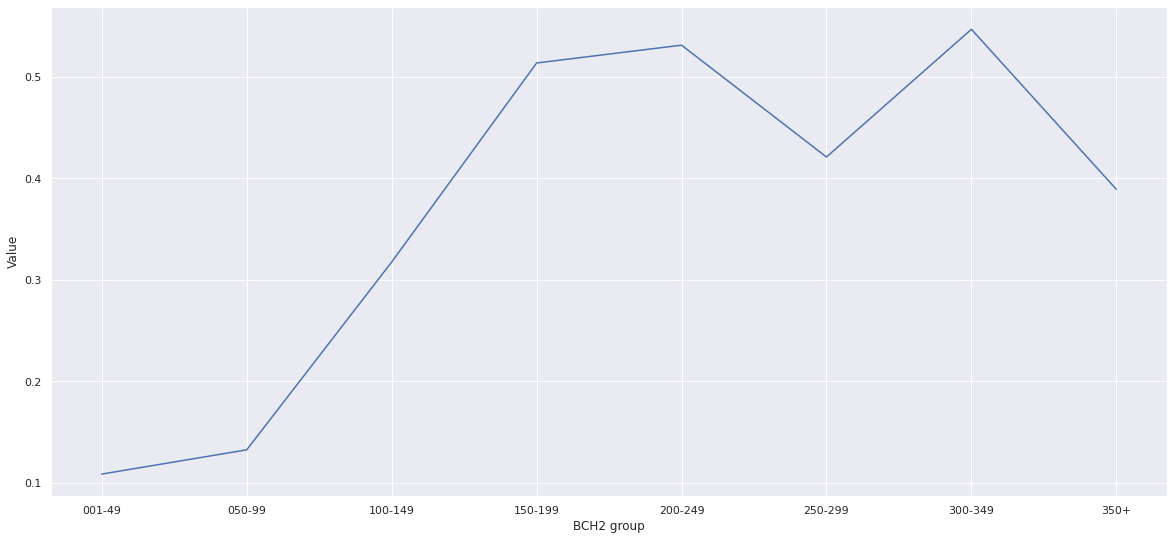

In [155]:
sns.lineplot(data=data, x="BCH2 group", y="Value")

It seems like the risk is very small in interval 1-99, a little bit larger in 100-149, and after that is around 50%.

Since Blood Chemistry 1 and 2 seems to hve high correlation, let's check if they affect the outcome saparetly.

In [156]:
def BCH2_wider_groups(row):
    if row['Blood Chemistry 2'] >= 1 and row['Blood Chemistry 2'] < 100:
        return '001-99'
    elif row['Blood Chemistry 2'] >= 100 and row['Blood Chemistry 2'] < 200:
        return '100-199'
    elif row['Blood Chemistry 2'] >= 200 and row['Blood Chemistry 2'] < 300:
        return '200-299'
    elif row['Blood Chemistry 2'] >= 300 and row['Blood Chemistry 2'] < 400:
        return '300-399'
    return '400+'

df['BCH2 wider group'] = df.apply(lambda row: BCH2_wider_groups(row), axis=1)

In [157]:
def BCH1_wider_groups(row):
    if row['Blood Chemistry 1'] >= 1 and row['Blood Chemistry 1'] < 25:
        return '001-24'
    elif row['Blood Chemistry 1'] >= 25 and row['Blood Chemistry 1'] < 50:
        return '025-49'
    elif row['Blood Chemistry 1'] >= 50 and row['Blood Chemistry 1'] < 75:
        return '050-74'
    elif row['Blood Chemistry 1'] >= 75 and row['Blood Chemistry 1'] < 100:
        return '075-99'
    elif row['Blood Chemistry 1'] >= 100 and row['Blood Chemistry 1'] < 125:
        return '100-124'
    elif row['Blood Chemistry 1'] >= 125 and row['Blood Chemistry 1'] < 150:
        return '125-149'
    return '150+'

df['BCH1 wider group'] = df.apply(lambda row: BCH1_wider_groups(row), axis=1)

In [158]:
df.groupby(['BCH1 wider group', 'BCH2 wider group', 'Outcome']).count()['BMI']

BCH1 wider group  BCH2 wider group  Outcome
025-49            400+              0.0          5
050-74            001-99            0.0         45
                  400+              0.0         59
075-99            001-99            0.0        348
                                    1.0         25
                  100-199           0.0         70
                                    1.0         10
                  200-299           1.0          5
                  400+              0.0        329
                                    1.0         30
100-124           001-99            0.0        184
                                    1.0         30
                  100-199           0.0        243
                                    1.0         59
                  200-299           0.0         45
                                    1.0         30
                  300-399           0.0          5
                  400+              0.0        448
                                    1.

In [159]:
values = df.groupby(['BCH1 wider group', 'BCH2 wider group', 'Outcome']).count()['BMI'].values
values = list(values)
values.insert(1,0)
values.insert(3,0)
values.insert(5,0)
values.insert(10,0)
values.insert(21,0)

for i in range(len(values)):
    if values[i] <= 5:
        values[i] = np.nan

In [160]:
percentages = [0] * 22



for i in range(0, len(values)-1, 2):
    
    percentages[int(i/2)] = values[i+1] / (values[i] + values[i+1])
    
percentages

[nan,
 nan,
 nan,
 0.06702412868632708,
 0.125,
 nan,
 0.08356545961002786,
 0.14018691588785046,
 0.19536423841059603,
 0.4,
 nan,
 0.32934131736526945,
 0.3333333333333333,
 0.5286885245901639,
 0.2,
 0.5128205128205128,
 0.47101449275362317,
 0.5714285714285714,
 0.7041420118343196,
 0.75,
 0.6666666666666666,
 0.7195121951219512]

In [161]:
data = {'Value': percentages, 'BCH1': ['25-49'] + ['50-74']*2 +
        ['75-99']*4 + ['100-124']*5 + ['125-149']*5 + ['150+']*5,
        'BCH2': ['400+']+['1-99']+['400+'] + ['1-99', '100-199','200-299', '400+'] +
        ['1-99', '100-199','200-299', '300-399', '400+']*3}

data = pd.DataFrame.from_dict(data)
data

,Value,BCH1,BCH2
0,NaN,25-49,400+
1,NaN,50-74,1-99
2,NaN,50-74,400+
3,0.067024,75-99,1-99
4,0.125000,75-99,100-199
5,NaN,75-99,200-299
6,0.083565,75-99,400+
7,0.140187,100-124,1-99
8,0.195364,100-124,100-199
9,0.400000,100-124,200-299


<AxesSubplot:xlabel='BCH1', ylabel='Value'>

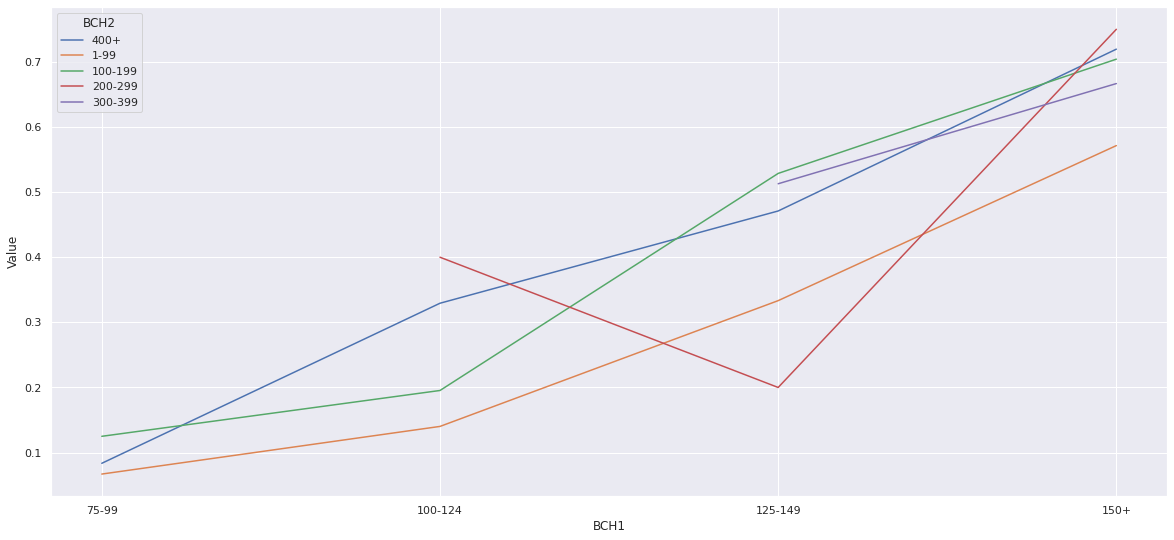

In [162]:
sns.lineplot(data=data, x="BCH1", y="Value", hue="BCH2")

<AxesSubplot:xlabel='BCH2', ylabel='Value'>

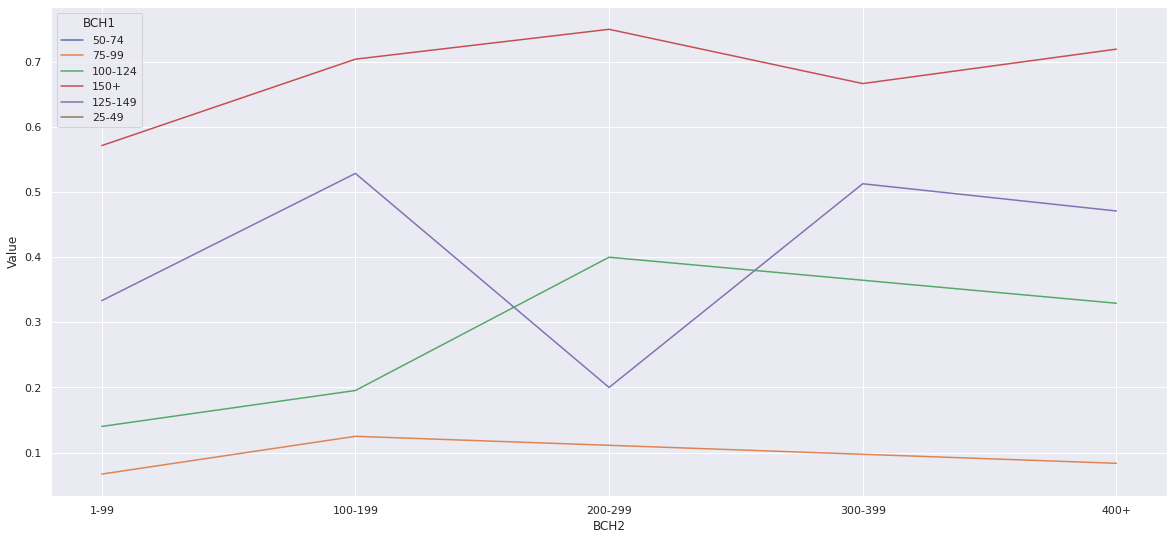

In [163]:
data = data.sort_values(by='BCH2', ascending=True)

sns.lineplot(data=data, x="BCH2", y="Value", hue="BCH1")

I seems like BCH2 has a smaller effect on risk, it's BCH1 which seems to have moderate correlation with BCH2, which has a real impact.

In [164]:
def BCH2_2_groups(row):
    if row['Blood Chemistry 2'] >= 1 and row['Blood Chemistry 2'] < 100:
        return '001-99'
    return '100+'

df['BCH2_2 group'] = df.apply(lambda row: BCH2_2_groups(row), axis=1)

In [165]:
df.groupby(['BCH2_2 group', 'Outcome']).count()['BMI']

BCH2_2 group  Outcome
001-99        0.0         622
              1.0          90
100+          0.0        1822
              1.0        1232
Name: BMI, dtype: int64

In [166]:
values = df.groupby(['BCH2_2 group', 'Outcome']).count()['BMI'].values

In [167]:
percentages = [0] * 2



for i in range(0, len(values)-1, 2):
    
    percentages[int(i/2)] = values[i+1] / (values[i] + values[i+1])
    
percentages

[0.12640449438202248, 0.4034053700065488]

In [168]:
data_BCH1_2 = {'Average Risk': percentages, 'Blood Chemistry 2': ['1-99', '100+']}

data_BCH1_2 = pd.DataFrame.from_dict(data_BCH1_2)
data_BCH1_2

,Average Risk,Blood Chemistry 2
0,0.126404,1-99
1,0.403405,100+


<AxesSubplot:xlabel='Blood Chemistry 2', ylabel='Average Risk'>

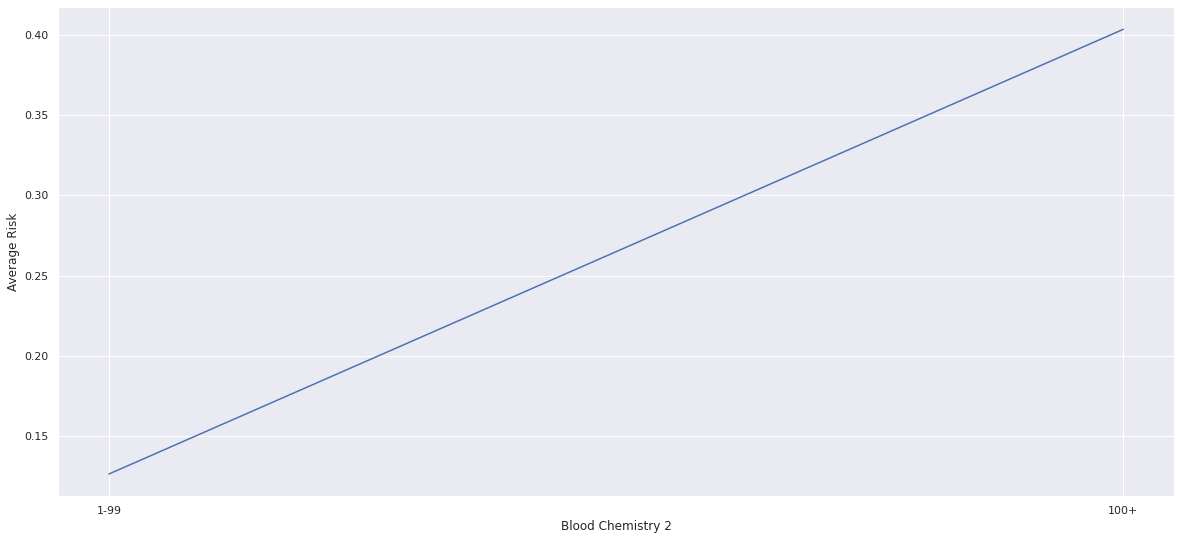

In [169]:
sns.lineplot(data=data_BCH1_2, x="Blood Chemistry 2", y="Average Risk")

we can easily separate risk of these two groups.

Let's check if Blood Chemistry 3 has an impact on risk.

<AxesSubplot:xlabel='Blood Chemistry 3', ylabel='Count'>

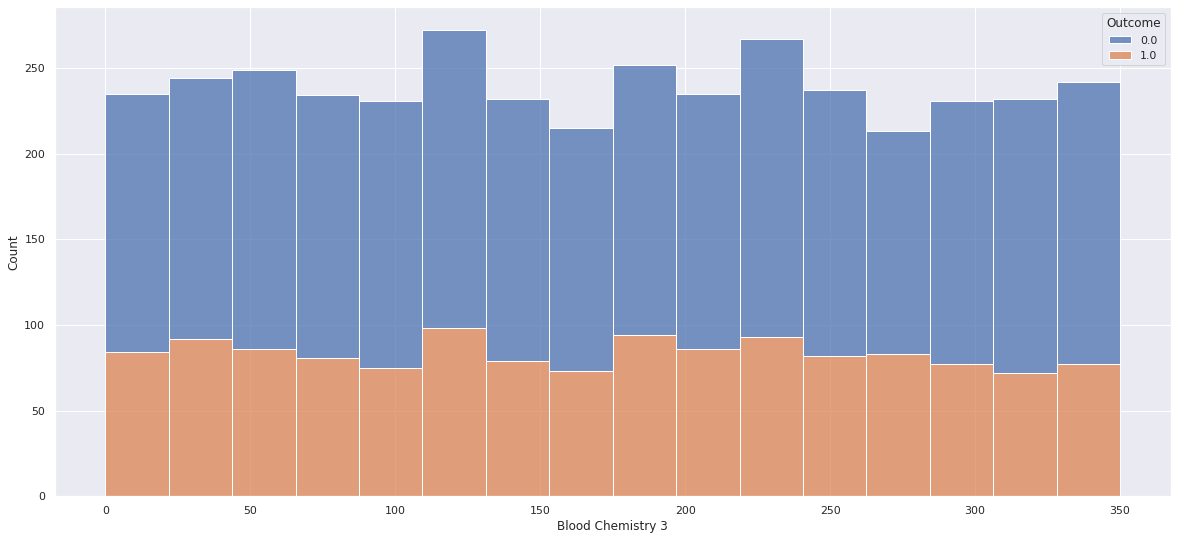

In [170]:
sns.set(rc={'figure.figsize':(20,9)})
data = df[~df['Blood Chemistry 3'].isnull()]
sns.histplot(data=data, x='Blood Chemistry 3', hue='Outcome', discrete=False, multiple='stack')

In [171]:
def BCH3_groups(row):
    if row['Blood Chemistry 3'] < 50:
        return '050 and less'
    elif row['Blood Chemistry 3'] < 100:
        return '050-100'
    elif row['Blood Chemistry 3'] < 150:
        return '100-150'
    elif row['Blood Chemistry 3'] < 200:
        return '150-200'
    elif row['Blood Chemistry 3'] < 250:
        return '200-250'
    elif row['Blood Chemistry 3'] < 300:
        return '250-300'
    return '300+'
    
    
df['BCH3 group'] = df.apply(lambda row: BCH3_groups(row), axis=1)

In [172]:
df.groupby(['BCH3 group', 'Outcome']).count()['BMI']

BCH3 group    Outcome
050 and less  0.0        334
              1.0        199
050-100       0.0        342
              1.0        176
100-150       0.0        375
              1.0        199
150-200       0.0        346
              1.0        190
200-250       0.0        354
              1.0        201
250-300       0.0        342
              1.0        189
300+          0.0        351
              1.0        168
Name: BMI, dtype: int64

In [173]:
values = df.groupby(['BCH3 group', 'Outcome']).count()['BMI'].values

In [174]:
percentages = [0] * 7



for i in range(0, len(values)-1, 2):
    
    percentages[int(i/2)] = values[i+1] / (values[i] + values[i+1])
    
percentages

[0.37335834896810505,
 0.33976833976833976,
 0.34668989547038326,
 0.35447761194029853,
 0.3621621621621622,
 0.3559322033898305,
 0.3236994219653179]

In [175]:
data_BCH3 = {'Average Risk': percentages, 'Blood Chemistry 3': ['50 and less', '50-100', '100-150', '150-200', '200-250', '250-300', '300+']}

data_BCH3 = pd.DataFrame.from_dict(data_BCH3)
data_BCH3

,Average Risk,Blood Chemistry 3
0,0.373358,50 and less
1,0.339768,50-100
2,0.346690,100-150
3,0.354478,150-200
4,0.362162,200-250
5,0.355932,250-300
6,0.323699,300+


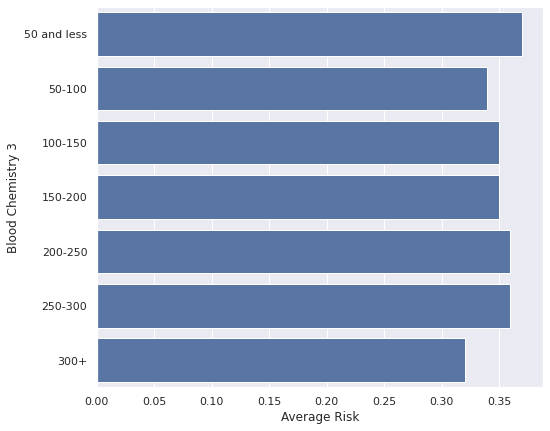

In [176]:
f, ax = plt.subplots(figsize=(8, 7))

ax = sns.barplot(data=data_BCH3.round(2), y="Blood Chemistry 3", x="Average Risk", color="b",
                 errwidth=0)
 
plt.show()

It's clear form the graph that Blood Chemistry 3 has no affect on disease risk.

It's time for Blood Pressure.

<AxesSubplot:xlabel='Blood Pressure', ylabel='Count'>

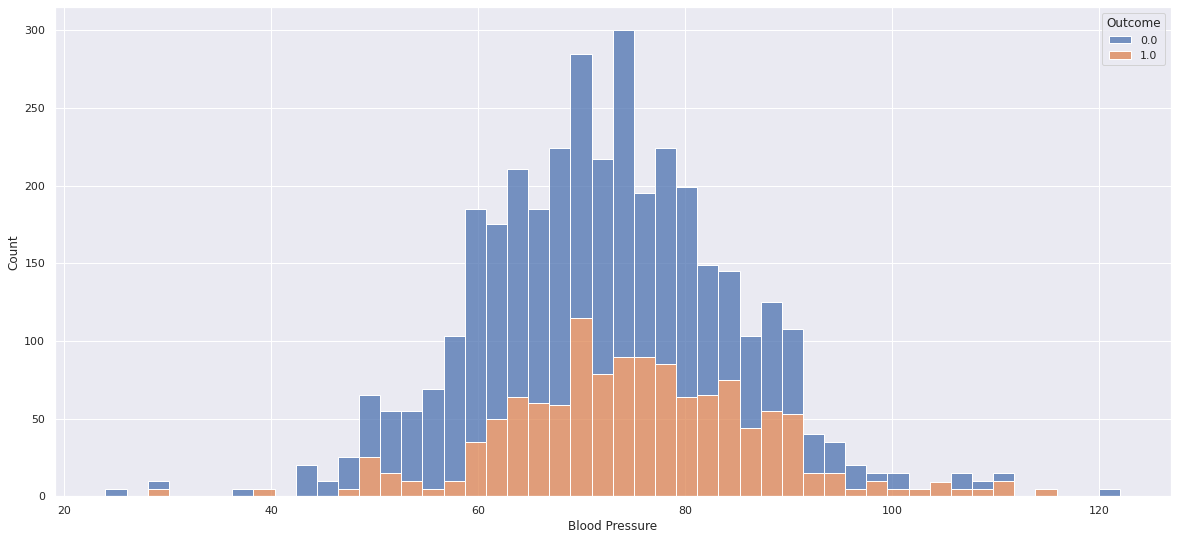

In [177]:
sns.set(rc={'figure.figsize':(20,9)})
data = df[~df['Blood Pressure'].isnull()]
sns.histplot(data=data, x='Blood Pressure', hue='Outcome', discrete=False, multiple='stack')

In [178]:
def BP_groups(row):
    if row['Blood Pressure'] < 60:
        return 'less than 60'
    elif row['Blood Pressure'] >= 60 and row['Blood Pressure'] < 70:
        return '060-69'
    elif row['Blood Pressure'] >= 70 and row['Blood Pressure'] < 80:
        return '070-79'
    elif row['Blood Pressure'] >= 80 and row['Blood Pressure'] < 90:
        return '080-89'
    return '90 and more'

df['BP group'] = df.apply(lambda row: BP_groups(row), axis=1)

In [179]:
labels = df.groupby(['BP group']).count()['BMI'].index
values = df.groupby(['BP group', 'Outcome']).count()['BMI'].values

In [180]:
df.groupby(['BP group', 'Outcome']).count()['BMI']

BP group      Outcome
060-69        0.0        707
              1.0        268
070-79        0.0        757
              1.0        459
080-89        0.0        413
              1.0        303
90 and more   0.0        220
              1.0        212
less than 60  0.0        347
              1.0         80
Name: BMI, dtype: int64

In [181]:
percentages = [0] * 5

for i in range(0, len(values)-1, 2):
    
    percentages[int(i/2)] = values[i+1] / (values[i] + values[i+1])
percentages

[0.27487179487179486,
 0.3774671052631579,
 0.4231843575418994,
 0.49074074074074076,
 0.1873536299765808]

In [182]:
data_BP = {'Average Risk': percentages, 'Blood Pressure': ['60-69', '70-79', '80-89', '90+', '59-']}

data_BP = pd.DataFrame.from_dict(data_BP)

data_BP

,Average Risk,Blood Pressure
0,0.274872,60-69
1,0.377467,70-79
2,0.423184,80-89
3,0.490741,90+
4,0.187354,59-


In [183]:
data_BP = data_BP.sort_values(by='Blood Pressure', ascending=True)

<AxesSubplot:xlabel='Blood Pressure', ylabel='Average Risk'>

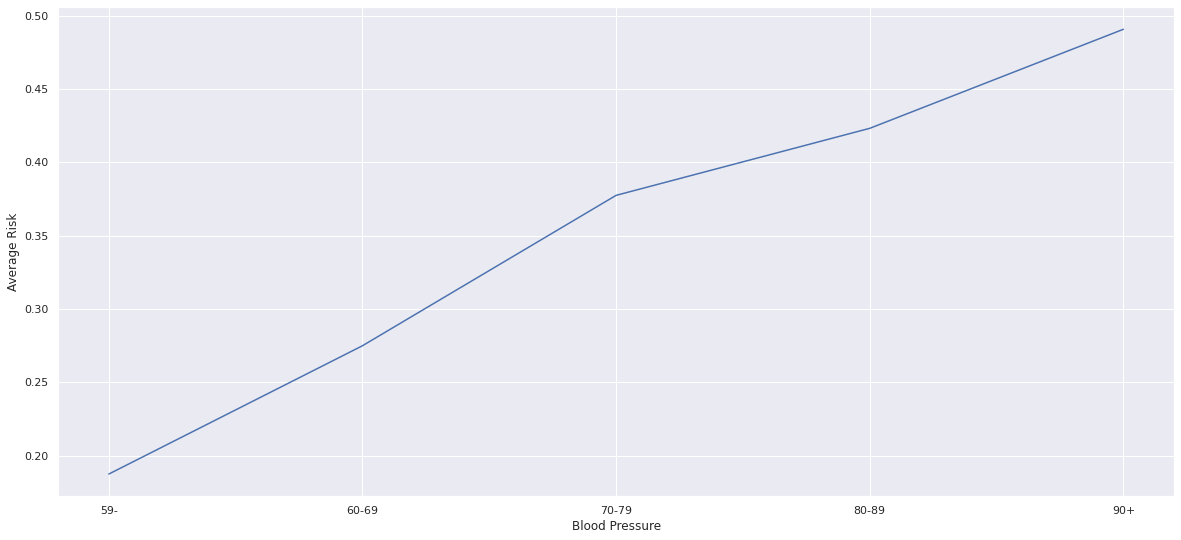

In [184]:
sns.lineplot(data=data_BP, x="Blood Pressure", y="Average Risk")

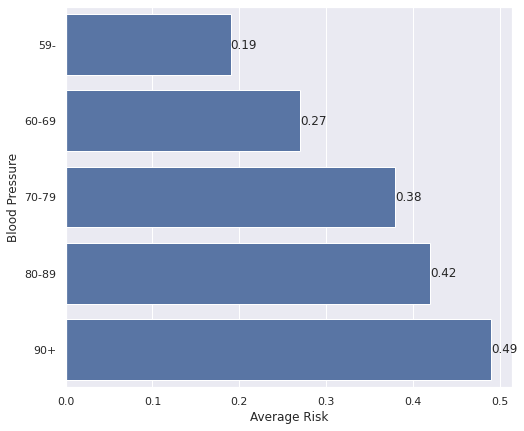

In [185]:
f, ax = plt.subplots(figsize=(8, 7))

ax = sns.barplot(data=data_BP.round(2), y="Blood Pressure", x="Average Risk", color="b",
                 errwidth=0)

ax.bar_label(ax.containers[0])

plt.show()

In fact, A blood pressure measurement has two numbers: The top number (systolic) is the pressure of the blood flow when the heart muscle squeezes (contracts), pumping blood. In our data we have one measurement only. However, our knowledge is that, both measurements (probably in our data also) increase with age. Let's check if division into age groups changes something.

In [186]:
df.groupby(['BP group', 'Age group', 'Outcome']).count()['BMI']

BP group      Age group  Outcome
060-69        20-29      0.0        527
                         1.0        109
              30-39      0.0        105
                         1.0         70
              40-49      0.0         50
                         1.0         74
              50-59      0.0         10
                         1.0         10
              60+        0.0         15
                         1.0          5
070-79        20-29      0.0        379
                         1.0        115
              30-39      0.0        174
                         1.0        155
              40-49      0.0        109
                         1.0        100
              50-59      0.0         55
                         1.0         74
              60+        0.0         40
                         1.0         15
080-89        20-29      0.0        219
                         1.0         84
              30-39      0.0         79
                         1.0         64
       

In [187]:
values = df.groupby(['BP group', 'Age group', 'Outcome']).count()['BMI'].values
values = list(values)
values.insert(45, 0)
values.insert(47, 0)

In [188]:
for i in range(len(values)):
    if values[i] <= 5:
        values[i] = np.nan

In [189]:
percentages = [0] * int(len(values)/2)

for i in range(0, len(values)-1, 2):
    
    percentages[int(i/2)] = values[i+1] / (values[i] + values[i+1])
percentages

[0.17138364779874213,
 0.4,
 0.5967741935483871,
 0.5,
 nan,
 0.23279352226720648,
 0.47112462006079026,
 0.4784688995215311,
 0.5736434108527132,
 0.2727272727272727,
 0.27722772277227725,
 0.44755244755244755,
 0.6296296296296297,
 0.631578947368421,
 0.25,
 0.4,
 0.5,
 0.6116504854368932,
 0.5588235294117647,
 0.42857142857142855,
 0.14619883040935672,
 0.5,
 nan,
 nan]

In [190]:
data_BP_AGE = {'Average Risk': percentages, 'Blood Pressure': ['60-69']*5 + ['70-79']*5 + ['80-89']*5 + ['90 and more']*5 + ['less than 60']*4,
        'Age': ['20-29', '30-39', '40-49', '50-59', '60+']*4 + ['20-29', '30-39', '40-49', '60+']}

data_BP_AGE = pd.DataFrame.from_dict(data_BP_AGE)
data_BP_AGE

,Average Risk,Blood Pressure,Age
0,0.171384,60-69,20-29
1,0.400000,60-69,30-39
2,0.596774,60-69,40-49
3,0.500000,60-69,50-59
4,NaN,60-69,60+
5,0.232794,70-79,20-29
6,0.471125,70-79,30-39
7,0.478469,70-79,40-49
8,0.573643,70-79,50-59
9,0.272727,70-79,60+


<AxesSubplot:xlabel='Age', ylabel='Average Risk'>

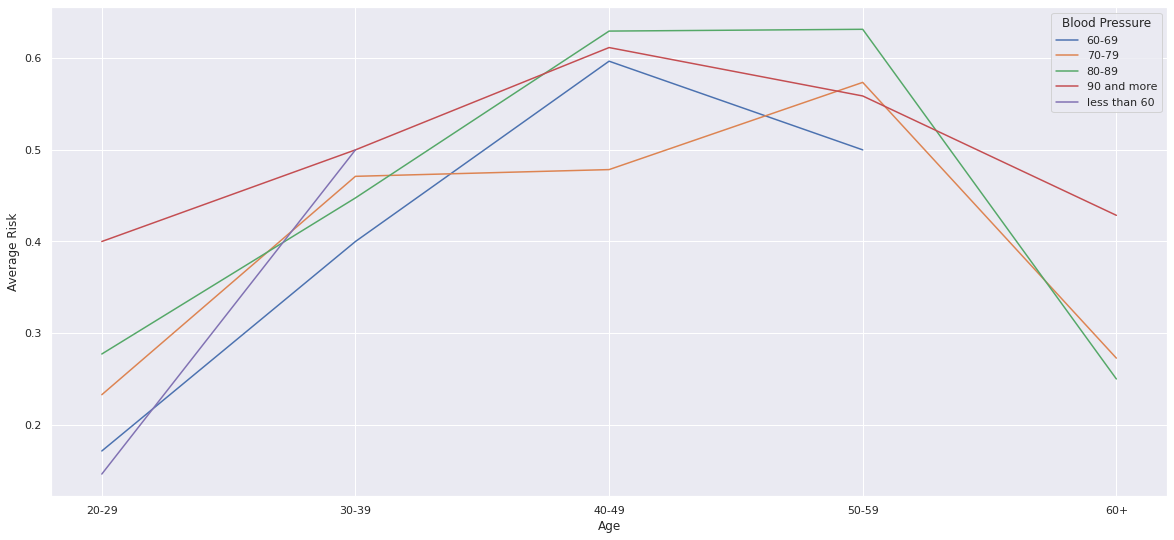

In [191]:
sns.lineplot(data=data_BP_AGE, x="Age", y="Average Risk", hue="Blood Pressure")

It looks like too high Blood Pressure, in 20-30 and 60+ ages increases the risk.

In [192]:
data_BP_20to29 = {'Average Risk': [0.146199, 0.170047, 0.232794, 0.277228, 0.400000,], 'Blood Pressure': ['less than 60'] + ['60-69'] + ['70-79'] + ['80-89'] + ['90 and more']}

data_BP_20to29 = pd.DataFrame.from_dict(data_BP_20to29)
data_BP_20to29

,Average Risk,Blood Pressure
0,0.146199,less than 60
1,0.170047,60-69
2,0.232794,70-79
3,0.277228,80-89
4,0.400000,90 and more


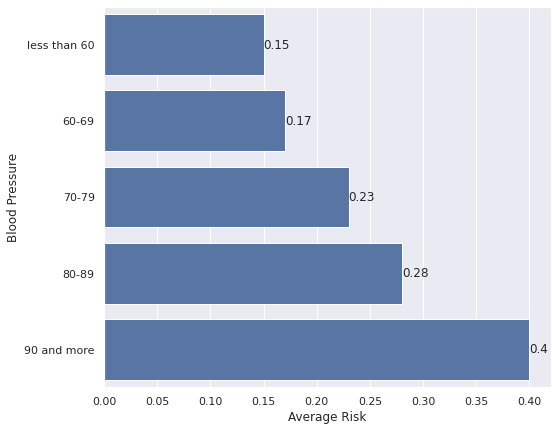

In [193]:
f, ax = plt.subplots(figsize=(8, 7))

ax = sns.barplot(data=data_BP_20to29.round(2), y="Blood Pressure", x="Average Risk", color="b",
                 errwidth=0)

ax.bar_label(ax.containers[0])

plt.show()

In [194]:
def Age60_groups(row):
    if row['Age'] < 60:
        return 'less than 60'
    return '60 and more'

df['Age60 group'] = df.apply(lambda row: Age60_groups(row), axis=1)

In [195]:
def BP90_groups(row):
    if row['Blood Pressure'] < 90:
        return 'less than 90'
    return '90 and more'

df['BP90 group'] = df.apply(lambda row: BP90_groups(row), axis=1)

In [196]:
df.groupby(['Age60 group', 'BP90 group', 'Outcome']).count()['BMI']

Age60 group   BP90 group    Outcome
60 and more   90 and more   0.0          20
                            1.0          15
              less than 90  0.0          95
                            1.0          30
less than 60  90 and more   0.0         200
                            1.0         197
              less than 90  0.0        2129
                            1.0        1080
Name: BMI, dtype: int64

In [197]:
values = df.groupby(['Age60 group', 'BP90 group', 'Outcome']).count()['BMI'].values

In [198]:
percentages = [0] * 4

for i in range(0, len(values)-1, 2):
    
    percentages[int(i/2)] = values[i+1] / (values[i] + values[i+1])
percentages

[0.42857142857142855, 0.24, 0.49622166246851385, 0.33655344344032406]

In [199]:
data_BP_AGE60 = {'Average Risk': [0.25, 0.42857142857142855], 'Age': ['60 and more']*2, 'Blood Pressure': ['less than 90', '90 and more']}

data_BP_AGE60 = pd.DataFrame.from_dict(data_BP_AGE60)
data_BP_AGE60

,Average Risk,Age,Blood Pressure
0,0.250000,60 and more,less than 90
1,0.428571,60 and more,90 and more


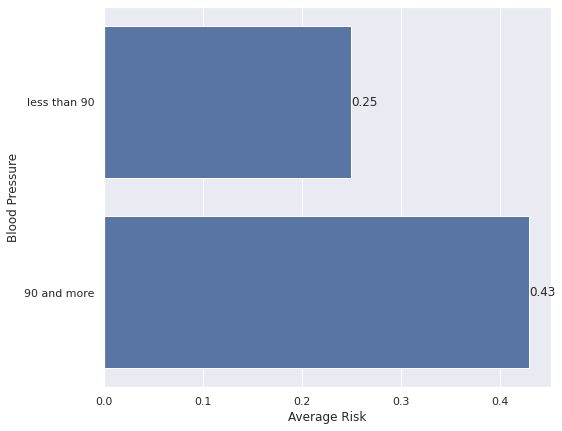

In [200]:
f, ax = plt.subplots(figsize=(8, 7))

ax = sns.barplot(data=data_BP_AGE60.round(2), y="Blood Pressure", x="Average Risk", color="b",
                 errwidth=0)

ax.bar_label(ax.containers[0])

plt.show()

Almost twice time as large.

Now let's take a look at Skin Condition.

<AxesSubplot:xlabel='Skin Condition', ylabel='Count'>

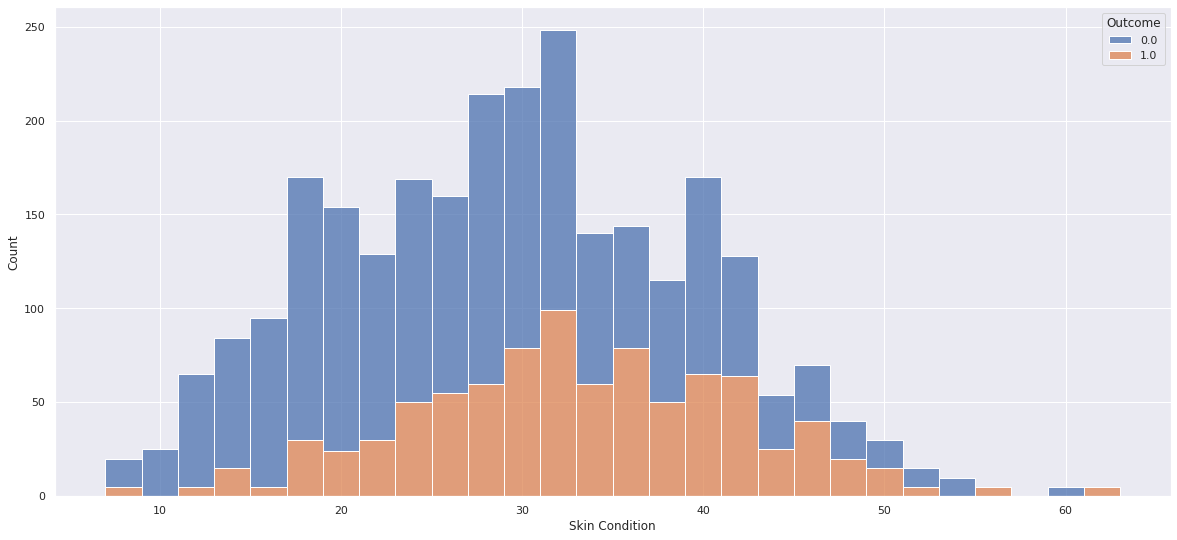

In [201]:
sns.set(rc={'figure.figsize':(20,9)})
data = df[~df['Skin Condition'].isnull()]
sns.histplot(data=data, x='Skin Condition', hue='Outcome', discrete=False, multiple='stack')

In [202]:
df.groupby(['Skin Condition', 'Outcome']).count()['BMI']

Skin Condition  Outcome
7.0             0.0         5
                1.0         5
8.0             0.0        10
10.0            0.0        25
11.0            0.0        30
                           ..
52.0            0.0        10
54.0            0.0        10
56.0            1.0         5
60.0            0.0         5
63.0            1.0         5
Name: BMI, Length: 86, dtype: int64

In [203]:
def SC_groups(row):
    if row['Skin Condition'] < 20:
        return 'less than 20'
    elif row['Skin Condition'] >= 20 and row['Skin Condition'] < 30:
        return '020-29'
    elif row['Skin Condition'] >= 30 and row['Skin Condition'] < 40:
        return '030-39'
    return '40 and more'

df['SC group'] = df.apply(lambda row: SC_groups(row), axis=1)

In [204]:
df.groupby(['SC group', 'Outcome']).count()['BMI']

SC group      Outcome
020-29        0.0        572
              1.0        239
030-39        0.0        498
              1.0        373
40 and more   0.0        900
              1.0        636
less than 20  0.0        474
              1.0         74
Name: BMI, dtype: int64

In [205]:
values = df.groupby(['SC group', 'Outcome']).count()['BMI'].values

In [206]:
percentages = [0] * 4

for i in range(0, len(values)-1, 2):
    
    percentages[int(i/2)] = values[i+1] / (values[i] + values[i+1])
percentages

[0.29469790382244143, 0.42824339839265213, 0.4140625, 0.13503649635036497]

In [207]:
labels = ['20-29', '30-39', '40+', '20-']

data = {'Skin Condition': labels, 'Value': percentages}

data = pd.DataFrame.from_dict(data)
data

,Skin Condition,Value
0,20-29,0.294698
1,30-39,0.428243
2,40+,0.414062
3,20-,0.135036


<AxesSubplot:xlabel='Skin Condition', ylabel='Value'>

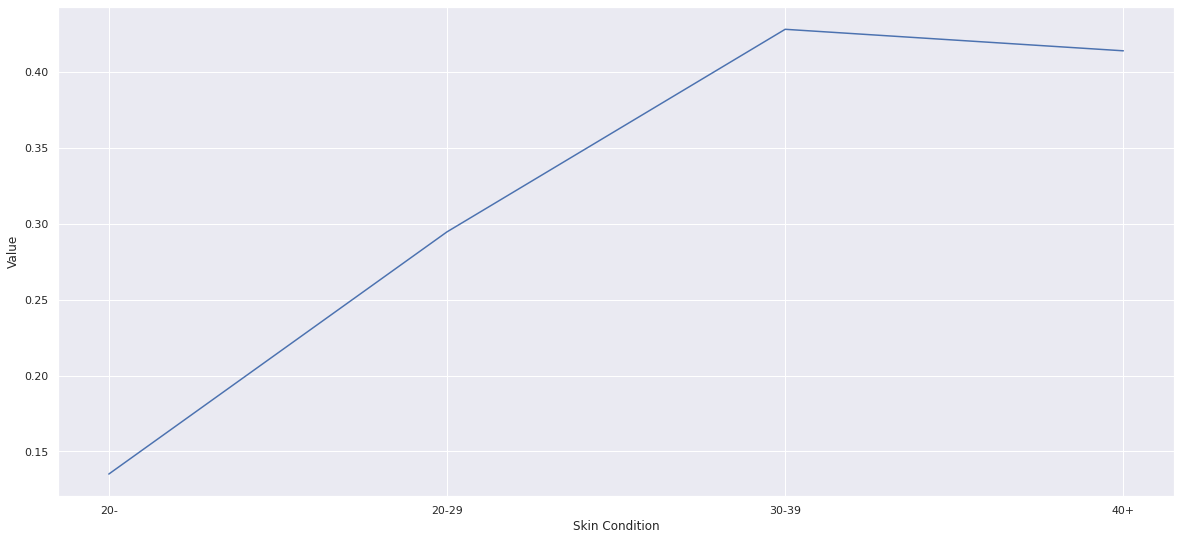

In [208]:
data = data.sort_values(by='Skin Condition', ascending=True)
sns.lineplot(data=data, x="Skin Condition", y="Value")

In [209]:
def SC3_groups(row):
    if row['Skin Condition'] < 20:
        return 'less than 20'
    elif row['Skin Condition'] < 30:
        return '020-29'
    return '30 and more'

df['SC3 group'] = df.apply(lambda row: SC3_groups(row), axis=1)

In [210]:
df.groupby(['SC3 group', 'Outcome']).count()['BMI']

SC3 group     Outcome
020-29        0.0         572
              1.0         239
30 and more   0.0        1398
              1.0        1009
less than 20  0.0         474
              1.0          74
Name: BMI, dtype: int64

In [211]:
values = df.groupby(['SC3 group', 'Outcome']).count()['BMI'].values

In [212]:
percentages = [0] * 3

for i in range(0, len(values)-1, 2):
    
    percentages[int(i/2)] = values[i+1] / (values[i] + values[i+1])
percentages

[0.29469790382244143, 0.4191940174491068, 0.13503649635036497]

In [213]:
labels = ['less than 20', '20-29', '30 and more']

data_SC3 = {'Skin Condition': labels, 'Average Risk': [0.13503649635036497, 0.29469790382244143, 0.4191940174491068]}

data_SC3 = pd.DataFrame.from_dict(data_SC3)
data_SC3

,Skin Condition,Average Risk
0,less than 20,0.135036
1,20-29,0.294698
2,30 and more,0.419194


Factors such as inflammation rises with BMI. We will check in a moment if our factor descrives Outcome by itself. Let's see BMI at first.

<AxesSubplot:xlabel='BMI', ylabel='Count'>

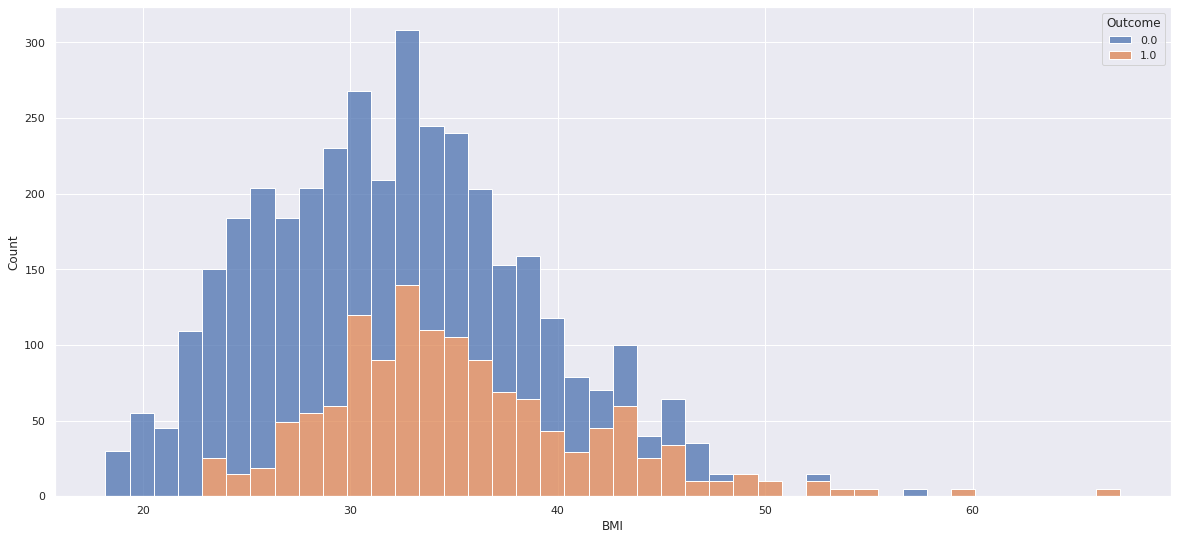

In [214]:
sns.set(rc={'figure.figsize':(20,9)})
data = df[~df['BMI'].isnull()]
sns.histplot(data=data, x='BMI', hue='Outcome', discrete=False, multiple='stack')

In [215]:
df.groupby(['BMI', 'Outcome']).count()['Pregnancies']

BMI   Outcome
18.2  0.0        15
18.4  0.0         5
19.1  0.0         5
19.3  0.0         5
19.4  0.0         5
                 ..
53.2  1.0         5
55.0  1.0         5
57.3  0.0         5
59.4  1.0         5
67.1  1.0         5
Name: Pregnancies, Length: 356, dtype: int64

From google we can se that Jon Brower Minnoch had 105.3 BMI so our outliers are reliable.

In [216]:
def BMI_groups(row):
    if row['BMI'] < 25:
        return 'healthy'
    elif row['BMI'] >= 25 and row['BMI'] < 30:
        return 'overweight'
    elif row['BMI'] >= 30 and row['BMI'] < 35:
        return 'class 1 obesity'
    elif row['BMI'] >= 35 and row['BMI'] < 40:
        return 'class 2 obesity'
    return 'class 3 obesity'

df['BMI group'] = df.apply(lambda row: BMI_groups(row), axis=1)

In [217]:
df.groupby(['BMI group', 'Outcome']).count()['Pregnancies']

BMI group        Outcome
class 1 obesity  0.0        610
                 1.0        505
class 2 obesity  0.0        432
                 1.0        311
class 3 obesity  0.0        260
                 1.0        283
healthy          0.0        493
                 1.0         35
overweight       0.0        694
                 1.0        198
Name: Pregnancies, dtype: int64

In [218]:
values = df.groupby(['BMI group', 'Outcome']).count()['Pregnancies'].values

percentages = [0] * 5

for i in range(0, len(values)-1, 2):
    
    percentages[int(i/2)] = values[i+1] / (values[i] + values[i+1])
percentages

[0.452914798206278,
 0.4185733512786003,
 0.5211786372007366,
 0.06628787878787878,
 0.2219730941704036]

In [219]:
labels = ['class 1 obesity', 'class 2 obesity', 'class 3 obesity', 'healthy', 'overweight']

data = {'Value': percentages, 'BMI': labels}

data = pd.DataFrame.from_dict(data)
data

,Value,BMI
0,0.452915,class 1 obesity
1,0.418573,class 2 obesity
2,0.521179,class 3 obesity
3,0.066288,healthy
4,0.221973,overweight


<AxesSubplot:xlabel='BMI', ylabel='Value'>

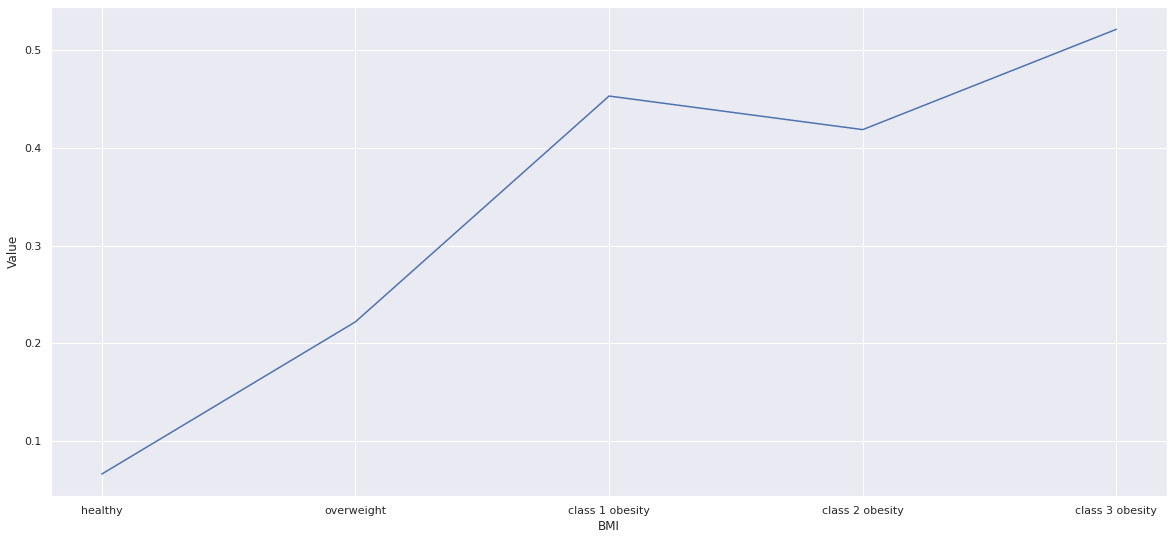

In [220]:
data = data.reindex([3, 4, 0, 1, 2])
sns.lineplot(data=data, x="BMI", y="Value")

In [221]:
def BMI3_groups(row):
    if row['BMI'] < 25:
        return 'healthy'
    elif row['BMI']< 30:
        return 'overweight'
    return 'obesity'

df['BMI3 group'] = df.apply(lambda row: BMI3_groups(row), axis=1)

In [222]:
df.groupby(['BMI3 group', 'Outcome']).count()['Pregnancies']

BMI3 group  Outcome
healthy     0.0         493
            1.0          35
obesity     0.0        1302
            1.0        1099
overweight  0.0         694
            1.0         198
Name: Pregnancies, dtype: int64

In [223]:
values = df.groupby(['BMI3 group', 'Outcome']).count()['Pregnancies'].values

percentages = [0] * 3

for i in range(0, len(values)-1, 2):
    
    percentages[int(i/2)] = values[i+1] / (values[i] + values[i+1])
percentages

[0.06628787878787878, 0.4577259475218659, 0.2219730941704036]

In [224]:
data_BMI = {'Average Risk': [0.06628787878787878, 0.2219730941704036, 0.4577259475218659], 'BMI': ['healthy', 'overweight', 'obesity']}

data_BMI = pd.DataFrame.from_dict(data_BMI)
data_BMI

,Average Risk,BMI
0,0.066288,healthy
1,0.221973,overweight
2,0.457726,obesity


<AxesSubplot:xlabel='BMI', ylabel='Average Risk'>

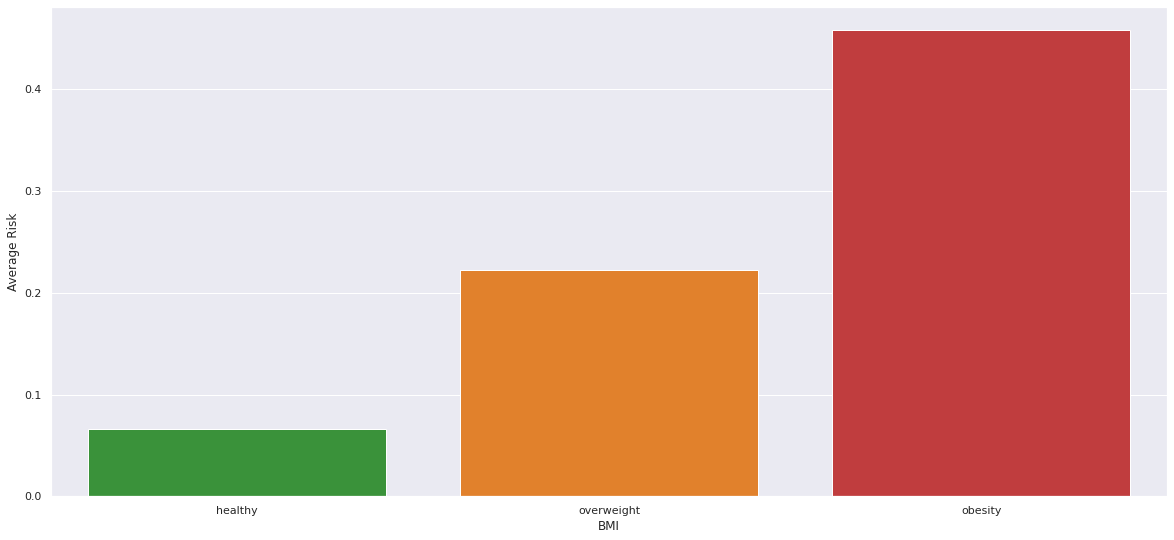

In [225]:
sns.barplot(data=data_BMI, x="BMI", y="Average Risk", palette = ['tab:green', 'tab:orange', 'tab:red'])

Seems like BMI matters. Let's compare BMI with Skin Condition now.

In [226]:
df.groupby(['BMI group', 'SC group', 'Outcome']).count()['Pregnancies']

BMI group        SC group      Outcome
class 1 obesity  020-29        0.0        183
                               1.0         95
                 030-39        0.0        154
                               1.0        160
                 40 and more   0.0        193
                               1.0        225
                 less than 20  0.0         80
                               1.0         25
class 2 obesity  020-29        0.0         80
                               1.0         70
                 030-39        0.0        174
                               1.0         90
                 40 and more   0.0        173
                               1.0        151
                 less than 20  0.0          5
class 3 obesity  020-29        0.0         20
                               1.0         20
                 030-39        0.0         60
                               1.0         83
                 40 and more   0.0        180
                               1.0       

In [227]:
values = df.groupby(['BMI group', 'SC group', 'Outcome']).count()['Pregnancies'].values

In [228]:
values = df.groupby(['BMI group', 'SC group', 'Outcome']).count()['Pregnancies'].values
values = list(values)
values.insert(15, 0)
values.insert(23, 0)
values.insert(25, 0)

for i in range(len(values)):
    if values[i] <= 5:
        values[i] = np.nan

percentages = [0] * 19

for i in range(0, len(values)-1, 2):
    
    percentages[int(i/2)] = values[i+1] / (values[i] + values[i+1])
percentages

[0.34172661870503596,
 0.5095541401273885,
 0.5382775119617225,
 0.23809523809523808,
 0.4666666666666667,
 0.3409090909090909,
 0.4660493827160494,
 nan,
 0.5,
 0.5804195804195804,
 0.5,
 nan,
 nan,
 0.1141552511415525,
 0.044642857142857144,
 0.19081272084805653,
 0.2962962962962963,
 0.25,
 0.1822429906542056]

In [229]:
data = {'Value': percentages,
        'BMI': ['class 1 obesity']*4 + ['class 2 obesity']*4 + ['class 3 obesity']*3 + ['healthy']*4 + ['overweight']*4,
        'Skin Condition': ['20-29', '30-39', '40+', '20-']*2 + ['20-29', '30-39', '40+'] + ['20-29', '30-39', '40+', '20-']*2}

data = pd.DataFrame.from_dict(data)
data

,Value,BMI,Skin Condition
0,0.341727,class 1 obesity,20-29
1,0.509554,class 1 obesity,30-39
2,0.538278,class 1 obesity,40+
3,0.238095,class 1 obesity,20-
4,0.466667,class 2 obesity,20-29
5,0.340909,class 2 obesity,30-39
6,0.466049,class 2 obesity,40+
7,NaN,class 2 obesity,20-
8,0.500000,class 3 obesity,20-29
9,0.580420,class 3 obesity,30-39


<AxesSubplot:xlabel='BMI', ylabel='Value'>

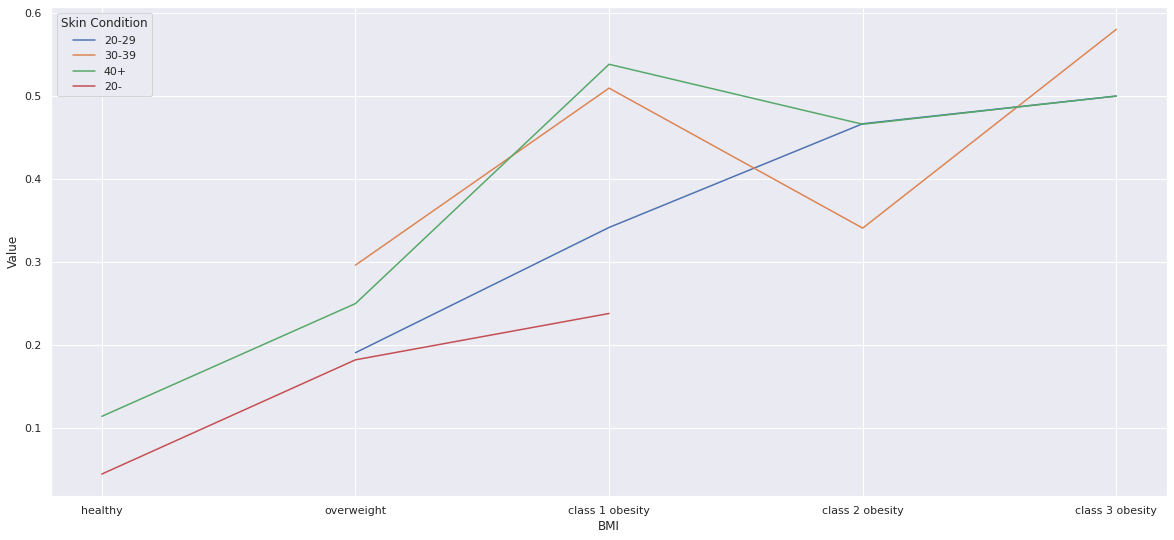

In [230]:
data = data.reindex([11, 12, 13, 14, 15, 16, 17, 18, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

sns.lineplot(data=data, x="BMI", y="Value", hue="Skin Condition")

<AxesSubplot:xlabel='Skin Condition', ylabel='Value'>

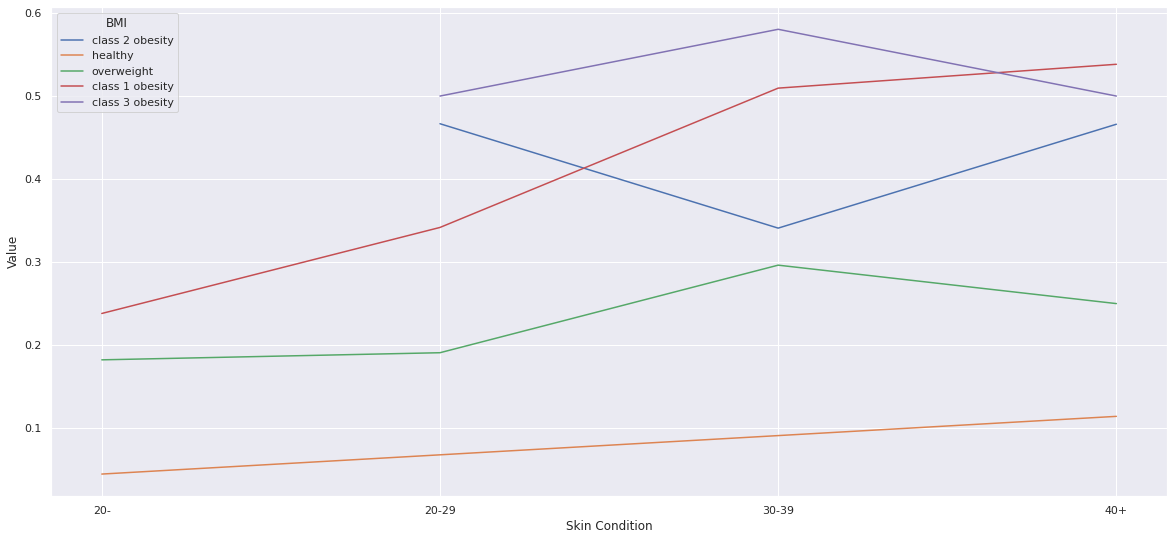

In [231]:
data = data.sort_values(by='Skin Condition', ascending=True)
sns.lineplot(data=data, x="Skin Condition", y="Value", hue="BMI")

It looks like Skin Condition has some effect on risk.

<AxesSubplot:xlabel='Genetic Predisposition Factor', ylabel='Count'>

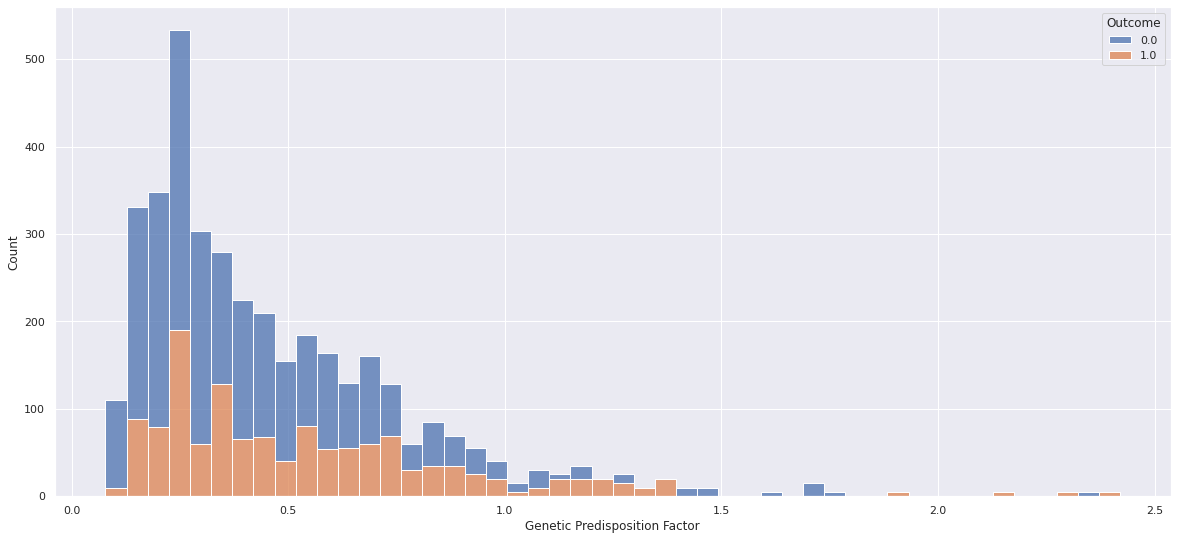

In [232]:
sns.set(rc={'figure.figsize':(20,9)})
data = df[~df['Genetic Predisposition Factor'].isnull()]
sns.histplot(data=data, x='Genetic Predisposition Factor', hue='Outcome', discrete=False, multiple='stack')

In [233]:
def GPF_groups(row):
    if row['Genetic Predisposition Factor'] < 0.5:
        return 'less than 0.5'
    elif row['Genetic Predisposition Factor'] >= 0.5 and row['Genetic Predisposition Factor'] < 1:
        return '0.5-1'
    return '1 and more'

df['GPF group'] = df.apply(lambda row: GPF_groups(row), axis=1)

In [234]:
df.groupby(['GPF group', 'Outcome']).count()['Pregnancies']

GPF group      Outcome
0.5-1          0.0         644
               1.0         483
1 and more     0.0         110
               1.0         145
less than 0.5  0.0        1735
               1.0         704
Name: Pregnancies, dtype: int64

In [235]:
values = df.groupby(['GPF group', 'Outcome']).count()['Pregnancies'].values

percentages = [0] * 3

for i in range(0, len(values)-1, 2):
    
    percentages[int(i/2)] = values[i+1] / (values[i] + values[i+1])
percentages

[0.42857142857142855, 0.5686274509803921, 0.28864288642886426]

In [236]:
labels = ['less than 0.5', '0.5-1', '1 and more']
percentages = [0.288643, 0.428571, 0.568627]

data_GPF = {'Average Risk': percentages, 'Genetic Predisposition Factor': labels}

data_GPF = pd.DataFrame.from_dict(data_GPF)
data_GPF

,Average Risk,Genetic Predisposition Factor
0,0.288643,less than 0.5
1,0.428571,0.5-1
2,0.568627,1 and more


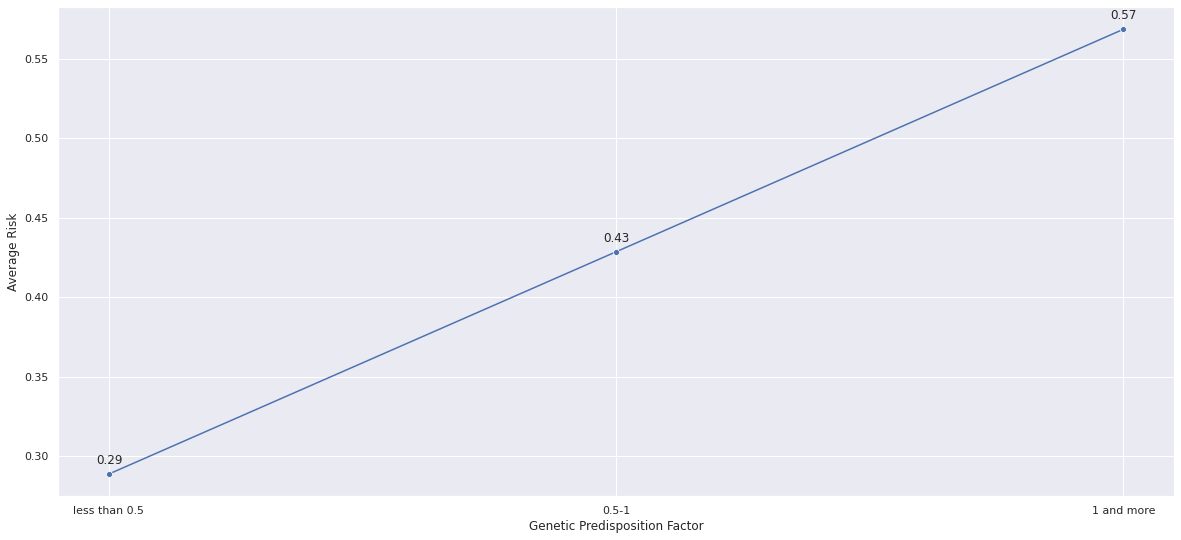

In [237]:
sns.lineplot(data=data_GPF, x="Genetic Predisposition Factor", y="Average Risk", marker="o")

percentages = [0.29, 0.43, 0.57]
for i in range(len(percentages)):
    
    plt.annotate(percentages[i], (i-0.025, percentages[i]+0.005)) 


Genetic Predisposition Factor has a clear impact on the risk.

It's time for Air Quality Index.

<AxesSubplot:xlabel='Air Quality Index', ylabel='Count'>

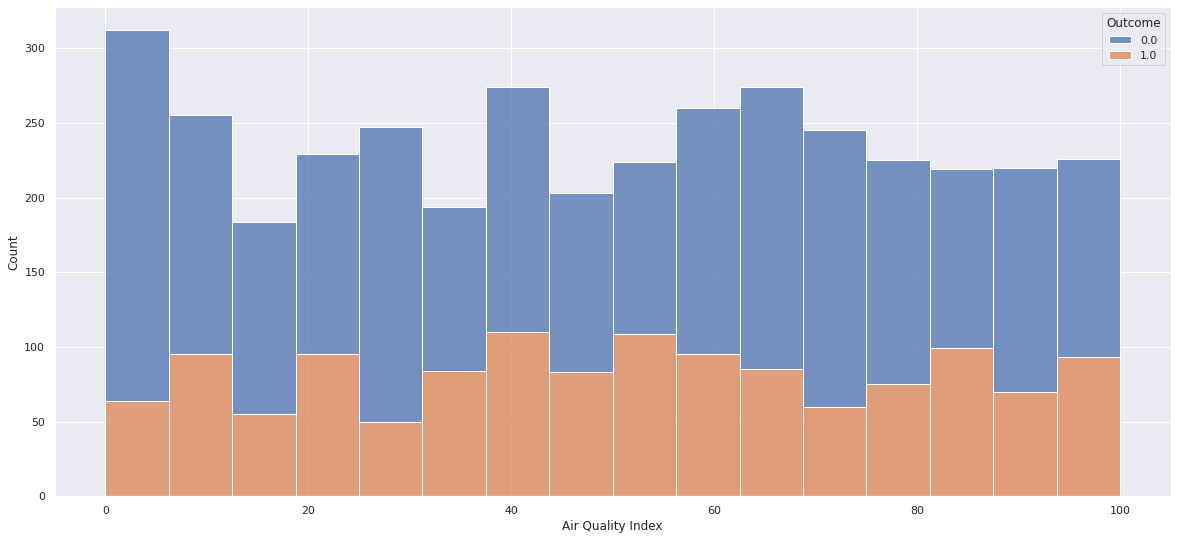

In [238]:
sns.set(rc={'figure.figsize':(20,9)})
data = df[~df['Air Quality Index'].isnull()]
sns.histplot(data=data, x='Air Quality Index', hue='Outcome', discrete=False, multiple='stack')

It looks like Air Quality Index has no impact or the impact is very small.

In [239]:
def AQI_groups(row):
    if row['Air Quality Index'] < 10:
        return '0-10'
    elif row['Air Quality Index'] >= 10 and row['Air Quality Index'] < 20:
        return '10-20'
    elif row['Air Quality Index'] >= 20 and row['Air Quality Index'] < 30:
        return '20-30'
    elif row['Air Quality Index'] >= 30 and row['Air Quality Index'] < 40:
        return '30-40'
    elif row['Air Quality Index'] >= 40 and row['Air Quality Index'] < 50:
        return '40-50'
    elif row['Air Quality Index'] >= 50 and row['Air Quality Index'] < 60:
        return '50-60'
    elif row['Air Quality Index'] >= 60 and row['Air Quality Index'] < 70:
        return '60-70'
    elif row['Air Quality Index'] >= 70 and row['Air Quality Index'] < 80:
        return '70-80'
    elif row['Air Quality Index'] >= 80 and row['Air Quality Index'] < 90:
        return '80-90'
    return '90-100'

df['AQI group'] = df.apply(lambda row: AQI_groups(row), axis=1)

In [240]:
df.groupby(['AQI group', 'Outcome']).count()['Pregnancies']

AQI group  Outcome
0-10       0.0        343
           1.0        109
10-20      0.0        233
           1.0        125
20-30      0.0        223
           1.0        100
30-40      0.0        233
           1.0        154
40-50      0.0        230
           1.0        148
50-60      0.0        185
           1.0        154
60-70      0.0        304
           1.0        150
70-80      0.0        265
           1.0         95
80-90      0.0        215
           1.0        154
90-100     0.0        258
           1.0        143
Name: Pregnancies, dtype: int64

In [241]:
values = df.groupby(['AQI group', 'Outcome']).count()['Pregnancies'].values

In [242]:
labels = df.groupby(['AQI group'])['Pregnancies'].count().index

In [243]:
percentages = [0] * 10

for i in range(0, len(values)-1, 2):
    
    percentages[int(i/2)] = values[i+1] / (values[i] + values[i+1])
percentages

[0.2411504424778761,
 0.34916201117318435,
 0.30959752321981426,
 0.3979328165374677,
 0.3915343915343915,
 0.45427728613569324,
 0.3303964757709251,
 0.2638888888888889,
 0.4173441734417344,
 0.3566084788029925]

In [244]:
data = {'Value': percentages, 'AIQ': labels}

data = pd.DataFrame.from_dict(data)
data

,Value,AIQ
0,0.241150,0-10
1,0.349162,10-20
2,0.309598,20-30
3,0.397933,30-40
4,0.391534,40-50
5,0.454277,50-60
6,0.330396,60-70
7,0.263889,70-80
8,0.417344,80-90
9,0.356608,90-100


<AxesSubplot:xlabel='AIQ', ylabel='Value'>

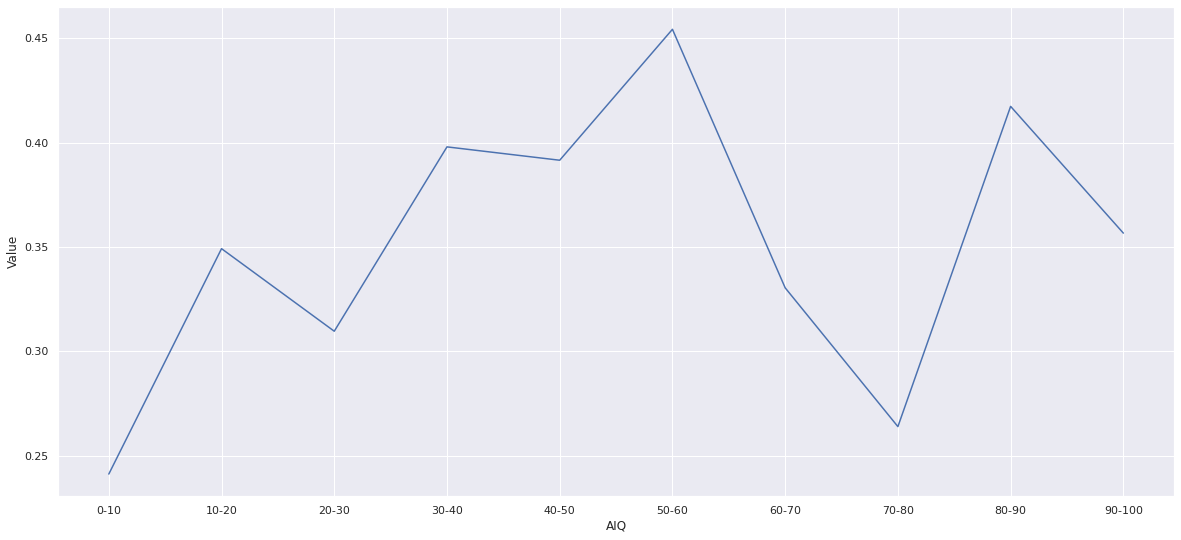

In [245]:
sns.lineplot(data=data, x="AIQ", y="Value")

We can see a higher risk for 30-60 and 70-80. Howevel the modelling is not clear.

In [246]:
def AQI3_groups(row):
    if row['Air Quality Index'] < 33:
        return '0-33'
    elif row['Air Quality Index'] < 67:
        return '34-67'
    return '68-100'

df['AQI3 group'] = df.apply(lambda row: AQI3_groups(row), axis=1)

In [247]:
values = df.groupby(['AQI3 group', 'Outcome']).count()['Pregnancies'].values
df.groupby(['AQI3 group', 'Outcome']).count()['Pregnancies']

AQI3 group  Outcome
0-33        0.0        893
            1.0        379
34-67       0.0        768
            1.0        491
68-100      0.0        828
            1.0        462
Name: Pregnancies, dtype: int64

In [248]:
percentages = [0] * 3

for i in range(0, len(values)-1, 2):
    
    percentages[int(i/2)] = values[i+1] / (values[i] + values[i+1])
percentages

[0.2979559748427673, 0.38999205718824465, 0.3581395348837209]

In [249]:
data_AIQ = {'Air Quality Index': ['0-33', '34-67', '68-100'], 'Average Risk': percentages}

data_AIQ = pd.DataFrame.from_dict(data_AIQ)
data_AIQ

,Air Quality Index,Average Risk
0,0-33,0.297956
1,34-67,0.389992
2,68-100,0.358140


<AxesSubplot:xlabel='Air Quality Index', ylabel='Average Risk'>

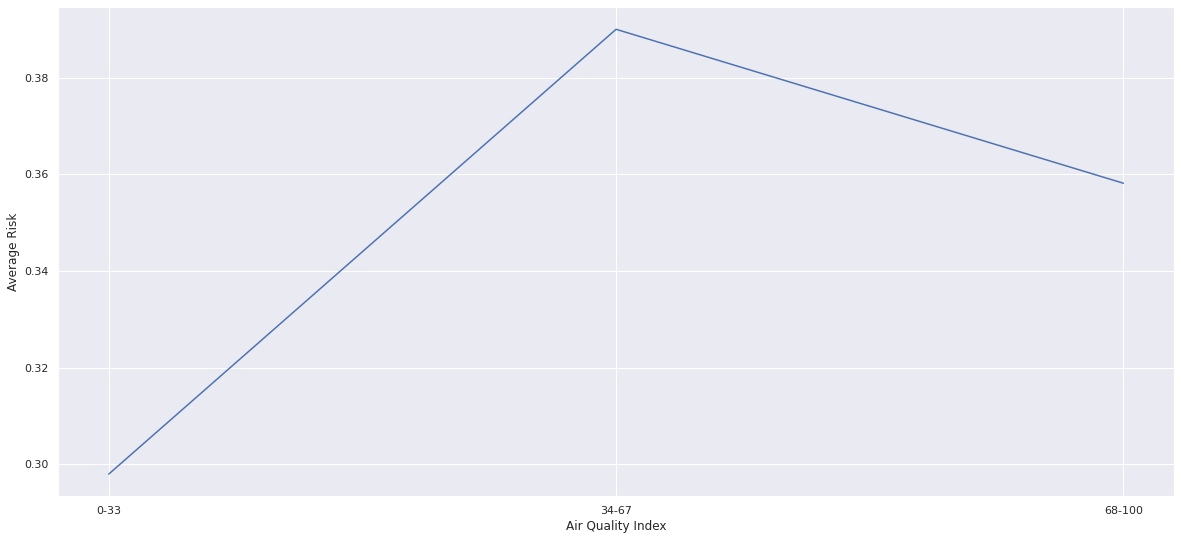

In [250]:
sns.lineplot(data=data_AIQ, x="Air Quality Index", y="Average Risk")

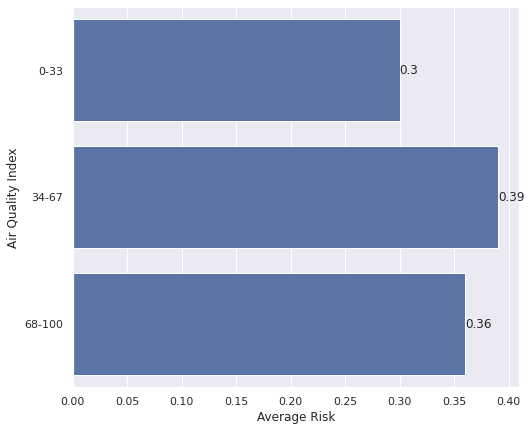

In [251]:
f, ax = plt.subplots(figsize=(8, 7))

ax = sns.barplot(data=data_AIQ.round(2), y="Air Quality Index", x="Average Risk", color="b",
                 errwidth=0)

ax.bar_label(ax.containers[0])

plt.show()

As we can see Air Quality Index seems rather insignificant.

<AxesSubplot:xlabel='State', ylabel='Count'>

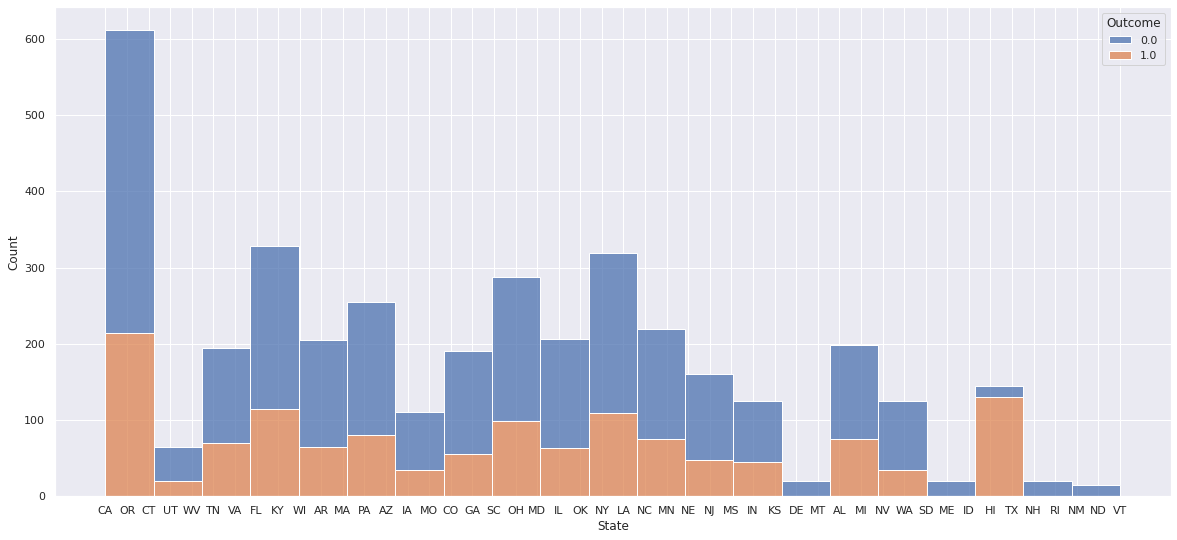

In [252]:
sns.set(rc={'figure.figsize':(20,9)})
data = df[~df['State'].isnull()]
sns.histplot(data=data, x='State', hue='Outcome', discrete=False, multiple='stack')

In [253]:
df.groupby(['State']).count()['Pregnancies'].values

array([ 64,  40,  90, 521,  55,  40,  10, 273, 135,  10,  35,  10, 158,
        80,  45,  55,  65,  85,  74,  10, 135,  85,  75,  40,  10, 135,
         5,  15,  10, 106,   5,  35, 254, 149,  48,  50, 165,  10,  65,
         5,  89, 135,  35, 105,   5,  85,  80,  30])

Because some states has very small amount of instances, it will be better to group them by region

In [254]:
west = ["CA", "OR", "WA", "NV", "ID", "UT", "CO", "WY", "MT", "HI", "AK"]
midwest = ["ND", "SD", "NE", "KS", "MN", "IA", "MO", "WI", "IL", "IN", "MI", "OH"]
southwest = ["AZ", "NM", "TX", "OK"]
southeast = ["AR", "LA", "MS", "TN", "AL", "KY", "GA", "WV", "VA", "NC", "SC", "FL", "MD", "DE"]
northeast = ["CT", "DC", "HI", "ME", "MA", "NH", "NJ", "NY", "PA", "RI", "VT"]

In [255]:
def State_groups(row):
    if row['State'] in west:
        return 'west'
    elif row['State'] in midwest:
        return 'midwest'
    elif row['State'] in southwest:
        return 'southwest'
    elif row['State'] in southeast:
        return 'southeast'
    return 'northeast'

df['State group'] = df.apply(lambda row: State_groups(row), axis=1)

In [256]:
df.groupby(['State group', 'Outcome']).count()['Pregnancies']

State group  Outcome
midwest      0.0        588
             1.0        279
northeast    0.0        479
             1.0        206
southeast    0.0        761
             1.0        419
southwest    0.0        109
             1.0        169
west         0.0        552
             1.0        259
Name: Pregnancies, dtype: int64

In [257]:
values = df.groupby(['State group', 'Outcome']).count()['Pregnancies'].values
labels = df.groupby(['State group']).count()['Pregnancies'].index

In [258]:
percentages = [0] * 5

for i in range(0, len(values)-1, 2):
    
    percentages[int(i/2)] = values[i+1] / (values[i] + values[i+1])
percentages

[0.3217993079584775,
 0.3007299270072993,
 0.3550847457627119,
 0.6079136690647482,
 0.3193588162762022]

In [259]:
data_state = {'Average Risk': percentages, 'State': labels}

data_state = pd.DataFrame.from_dict(data_state)
data_state

,Average Risk,State
0,0.321799,midwest
1,0.300730,northeast
2,0.355085,southeast
3,0.607914,southwest
4,0.319359,west


<AxesSubplot:xlabel='State', ylabel='Average Risk'>

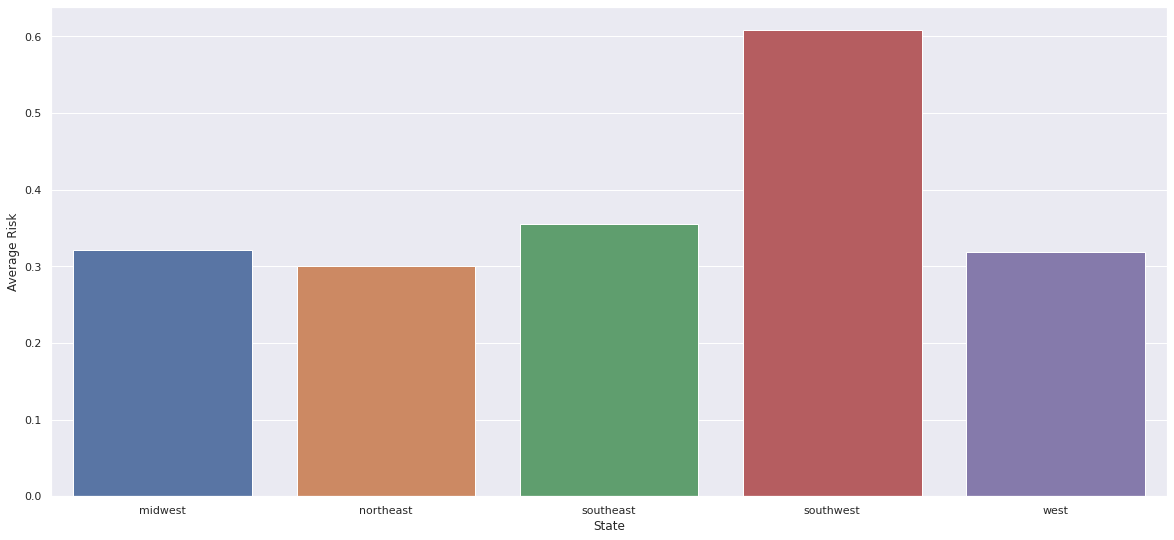

In [260]:
sns.barplot(data=data_state, x="State", y="Average Risk")

As we can see the risk for southwest states is higher.

Let's check the correlation with outcome using Cramer's V.

In [261]:
def State_num_groups(row):
    if row['State group'] == 'west':
        return 0
    elif row['State group'] == 'midwest':
        return 1
    elif row['State group'] == 'southwest':
        return 2
    elif row['State group'] == 'southeast':
        return 3
    return 4

df['State num group'] = df.apply(lambda row: State_num_groups(row), axis=1)

data = pd.crosstab(df['State num group'],df['Outcome'])

#Chi-squared test statistic, sample size, and minimum of rows and columns
X2 = stats.chi2_contingency(data, correction=False)[0]
n = np.sum(np.sum(data))
minDim = min(data.shape)-1

#calculate Cramer's V 
V = np.sqrt((X2/n) / minDim)

#display Cramer's V
print('Result: ', V)
print('Degrees of freedom: ', minDim)

Result:  0.1578863255851902
Degrees of freedom:  1


It imples that state groups and outcome are in small correlation.

<h3> Potentially next steps </h3>

- Train a model to classify patients, whether they have a disease or not, with what probability? f.e. Decision Tree (but we should deal with nans first), which important feature is that it may return us a feature importances.

- Cluster visualization based on feature importances.

<h2> Storytelling </h2>

Presentation notes:

-- Audience --

- Hospital staff, they perceive me as an analyst

- I will communicate as a person that is just a proffesional who helps

- Hospital staff probably would like to remember most crucial factors, that are connected with a risk

-- What do I need them to know or do --
    
- Hospital staff might not be familiar with the data, I should shortly descirbe it

-- Tone --

- Semi-formal / formal: I want to give an important information to doctors. The topic is serious. 

- I will present my results for the hostpital staff, but also they will have the opportunity to read it by themselfs. So, amount of the control that me - presenter have, and level of details should be centered. Such kind of document is called slideument.

<h3> Presentation </h3>

Our issue is that, there are too many patients with a risk of disease.

Doctor was able to create a dataset, which contains information about 3821 patients, the topic is serious.

The idea for overcoming the issue is to use data analysis to find factors that increase or decrease the risk.

Below you can see a very small piece of data in tabular form, that I used to find a crucial information about a risk of disease.

In [262]:
columns = ['Pregnancies', 'Blood Chemistry 1', 'Blood Chemistry 2',
              'Blood Chemistry 3', 'Blood Pressure', 'Skin Condition', 'BMI',
              'Genetic Predisposition Factor', 'Age', 'Air Quality Index',
              'State']

HTML(df.replace(np.nan, 'no value', inplace=False)[columns].head().to_html(index=False))

Pregnancies,Blood Chemistry 1,Blood Chemistry 2,Blood Chemistry 3,Blood Pressure,Skin Condition,BMI,Genetic Predisposition Factor,Age,Air Quality Index,State
1.0,no value,23.0,10.0,74.0,20.0,27.7,0.299,21.0,38.0,CA
1.0,no value,no value,61.0,68.0,35.0,32.0,0.389,22.0,10.0,CA
1.0,no value,no value,172.0,48.0,20.0,24.7,0.140,22.0,77.0,CA
5.0,44.0,no value,207.0,62.0,no value,25.0,0.587,36.0,40.0,OR
2.0,56.0,45.0,150.0,56.0,28.0,24.2,0.332,22.0,70.0,CT


We see on the top names of factors that we will consider in the context of raising and lowering the risk of disease. Below the names, we can see example data for these columns. Each row represents information about a single patient, while on average there are 5 rows per patient.

A short note before a factors presentation. For every average risk presented on the charts and tables, we should compare it to the basic risk, which is equal to about 35%. Every risk above this value means that risk is elevated. The risk is reduced when the value is below 35%.

The first factor I want to discuss is a number of Pregnancies. In our data we could find information about patients who had 0 to 17 pregnancies. In fact, more than 7 pregnancies increase the risk.

In [263]:
HTML(data_pregnancies[['Pregnancies', 'Average Risk']].round(2).to_html(index=False))

Pregnancies,Average Risk
7 and more,0.56
less than 7,0.29


As we can see, for people with 7 and more Pregnancies, the risk is twice as big as for people with fewer than 7 Pregnancies.

An important factor that I want to discuss is Age.

[Text(0.5, 1.0, 'Influence of Age on risk')]

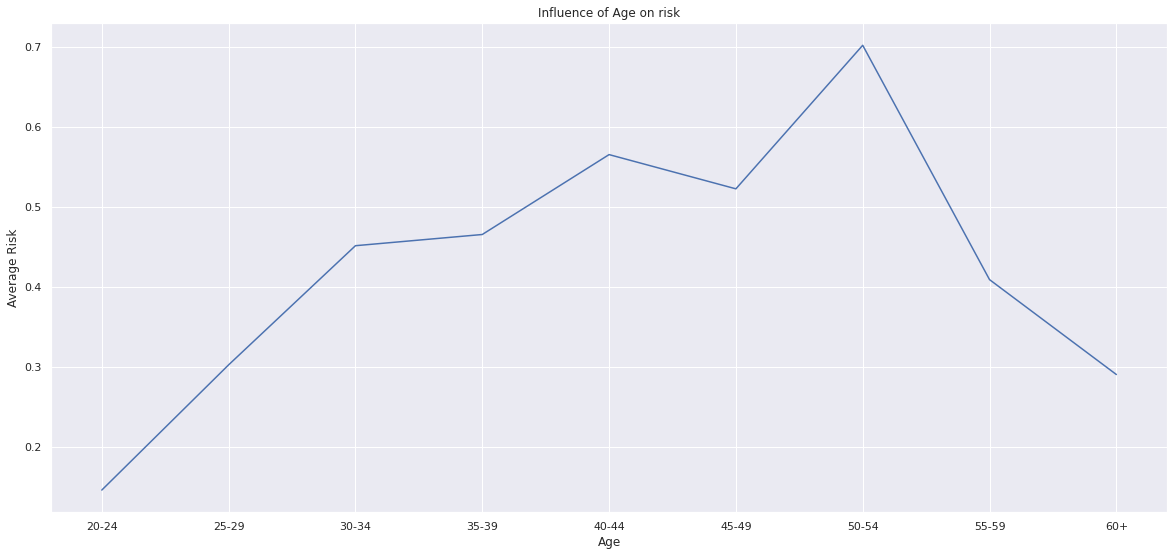

In [226]:
sns.lineplot(data=data_age, x="Age", y="Average Risk").set(title='Influence of Age on risk')

The risk is around 15% for people in age 20-24 and increases to the age 50-54 when is equal to 70%. Since then, the risk is decreasing. A moment from which risk is decreasing might be connected with women's menopause.

But there is a big exception to the rule: for women in Age 20-29 with 7 and more Pregnancies the risk is much higher.

In [227]:
HTML(data_pregnancy_age.to_html(index=False))

Average Risk,Age,Pregnancies
0.75,20-29,7 and more
0.21,20-29,less than 7


The risk is around 75% for such a woman. You doctors, know best what dangers can be associated with so many pregnancies at such a young age, f.e. anemia or uterine rupture.

It's time for Blood Chemistries.

As we will se Blood Chemistry 1 is an important measure.

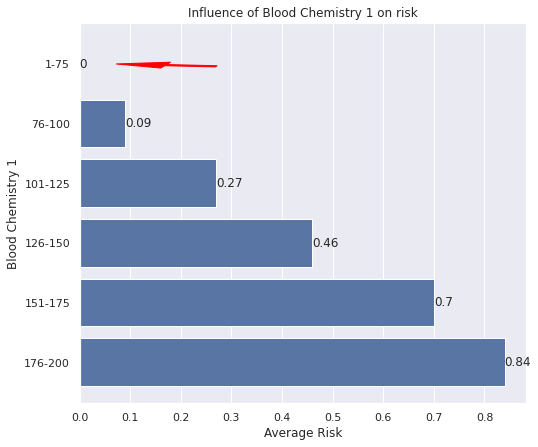

In [228]:
f, ax = plt.subplots(figsize=(8, 7))

ax = sns.barplot(data=data_BCH1.round(2), y="Blood Chemistry 1", x="Average Risk", color="b",
                 errwidth=0)
ax.set(title='Influence of Blood Chemistry 1 on risk')

plt.arrow(0.27,0.04,-0.1,-0.02, color='red', head_width=0.1, width=0.02, head_length=0.1)
 
ax.bar_label(ax.containers[0])

plt.show()

For patients with laboratory test results in 175, there is no risk of disease. However, the risk increases up to around 84% for results from 176 to 200.

Blood Chemistry 2 is not that important measure. However, also here we can obtain some information about risk.

In [229]:
HTML(data_BCH1_2.to_html(index=False))

Average Risk,Blood Chemistry 2
0.126404,1-99
0.403405,100+


Low values of this measure correspond to low average risk and values above 100 mean a higher risk.

Let us mention a Blood Chemistry 3 test.

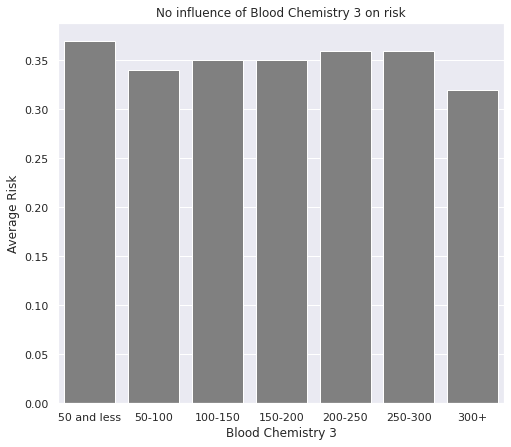

In [230]:
f, ax = plt.subplots(figsize=(8, 7))

ax = sns.barplot(data=data_BCH3.round(2), x="Blood Chemistry 3", y="Average Risk", color="grey",
                 errwidth=0)

ax.set(title='No influence of Blood Chemistry 3 on risk')

plt.show()

These results, has no signifficant impact on risk.

Blood Pressure is another measure, which gives some information about risk.

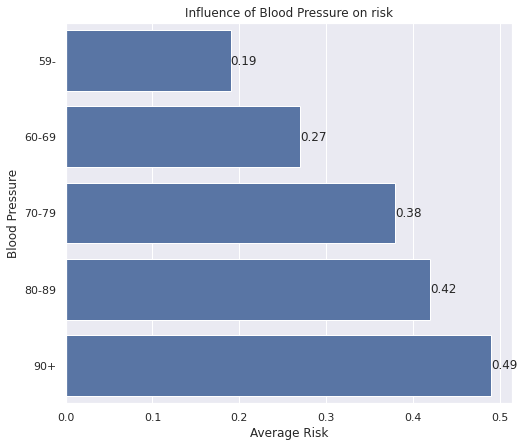

In [231]:
f, ax = plt.subplots(figsize=(8, 7))

ax = sns.barplot(data=data_BP.round(2), y="Blood Pressure", x="Average Risk", color="b",
                 errwidth=0)

ax.set(title='Influence of Blood Pressure on risk')

ax.bar_label(ax.containers[0])

plt.show()

In fact, the risk increases with increasing blood pressure.

More detailed relationships we can find in the additional context of age.

The first thing is risk based on blood pressure and age in 20-29.

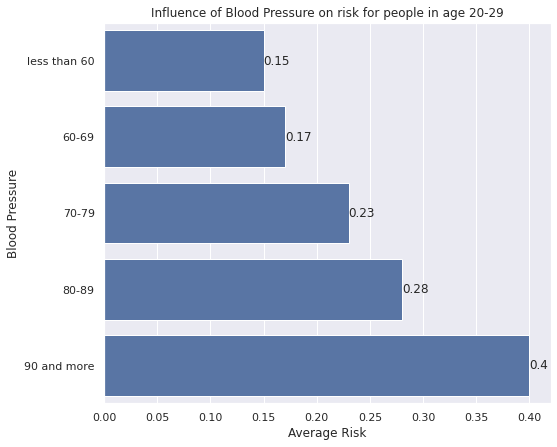

In [232]:
f, ax = plt.subplots(figsize=(8, 7))

ax = sns.barplot(data=data_BP_20to29.round(2), y="Blood Pressure", x="Average Risk", color="b",
                 errwidth=0)

ax.set(title='Influence of Blood Pressure on risk for people in age 20-29')

ax.bar_label(ax.containers[0])

plt.show()

We see a clear increase in risk relative to the pressure value.

The second interesting group is made by old people with low blood pressure.

In [233]:
HTML(data_BP_AGE60.to_html(index=False))

Average Risk,Age,Blood Pressure
0.250000,60 and more,less than 90
0.428571,60 and more,90 and more


Their risk is almost twice time smaller as for people of the same age with higher blood pressure - above 90.

Now let's look at BMI.

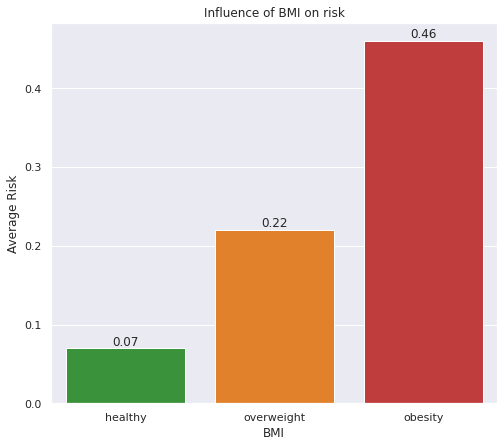

In [234]:
f, ax = plt.subplots(figsize=(8, 7))
ax = sns.barplot(data=data_BMI.round(2), x="BMI", y="Average Risk", palette = ['tab:green', 'tab:orange', 'tab:red'])
ax.set(title='Influence of BMI on risk')
ax.bar_label(ax.containers[0])
plt.show()

As we can see, the correct value of body mass index is very important in the context of the risk disease.

The next measurement is Skin Condition.

In [235]:
HTML(data_SC3.to_html(index=False))

Skin Condition,Average Risk
less than 20,0.135036
20-29,0.294698
30 and more,0.419194


For small values of Skin Condition, the risk also is small.

Let's deal with the Genetic Predisposition Factor now.

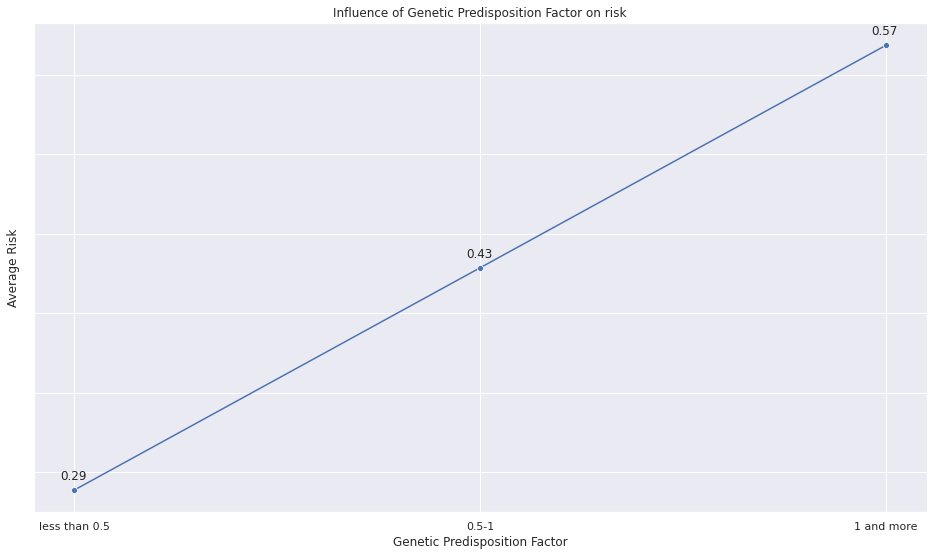

In [236]:
f, ax = plt.subplots(figsize=(16, 9))
ax = sns.lineplot(data=data_GPF, x="Genetic Predisposition Factor", y="Average Risk", marker="o")
ax.set(title='Influence of Genetic Predisposition Factor on risk')

percentages = [0.29, 0.43, 0.57]
for i in range(len(percentages)):
    
    plt.annotate(percentages[i], (i-0.035, percentages[i]+0.005)) 

ax.set(yticklabels=[])
plt.show()

As we can see, the risk is growing at a rate close to uniform, from 0.27 for values below 0.5, to around 0.57 for values above 1.

The next issue is the influence of states on risk.

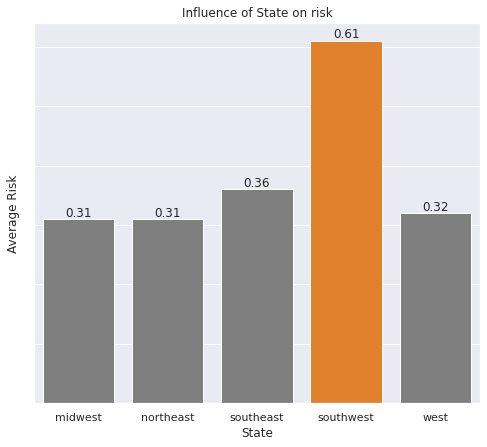

In [237]:
f, ax = plt.subplots(figsize=(8, 7))
ax = sns.barplot(data=data_state.round(2), x="State", y="Average Risk", palette = ['tab:gray', 'tab:gray', 'tab:gray', 'tab:orange', 'tab:gray'])
ax.bar_label(ax.containers[0])
ax.set(title='Influence of State on risk')
ax.set(yticklabels=[])
plt.show()

It's clear that for a southwest group of states containing:

- Arizona

- New Mexico

- Texas

- Ohio

the risk is higher, equal to about 61%.

Let's check the Air Quality Index.

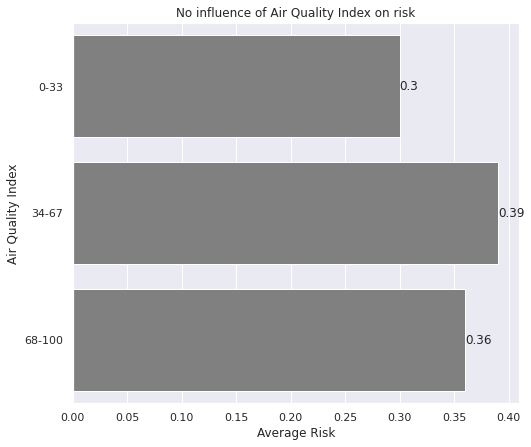

In [238]:
f, ax = plt.subplots(figsize=(8, 7))

ax = sns.barplot(data=data_AIQ.round(2), y="Air Quality Index", x="Average Risk", color="gray",
                 errwidth=0)

ax.set(title='No influence of Air Quality Index on risk')

ax.bar_label(ax.containers[0])

plt.show()

As we can see, this factor is rather insignificant.

In conclusion, we have looked at the various factors that increase the risk of the disease. We have emphasized the importance of Blood Chemistry 1 or Age, which we should in particular be guided by when making a preliminary diagnosis. We also noted a non-significant effect on the risk of the Blood Chemistry 3 and Air Quality Index. It may also be important to remember the interrelationships between the factors discussed, e.g. very high risk of the disease for women at a young age, with a large number of pregnancies.

<h2> References </h2>

- Storytelling with Data: A Data Visualization Guide for Business Professionals
Publisher ‏ : ‎ Wiley; 1st edition (November 2, 2015)
Language ‏ : ‎ English
ISBN-10 ‏ : ‎ 1119002257
ISBN-13 ‏ : ‎ 978-1119002253

- https://www.kaggle.com/code/parulpandey/a-guide-to-handling-missing-values-in-python

- https://stats.stackexchange.com/questions/462507/how-to-decide-whether-missing-values-are-mar-mcar-or-mnar

- https://www.youtube.com/watch?v=YpqUbirqFxQ

- https://www.youtube.com/watch?v=Wdvwer7h-8w

- https://www.statology.org/cramers-v-in-python/